# Time Domain Features 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
from scipy.stats import kurtosis, skew
from scipy.signal import correlate

In [3]:
debussy_file = "audio/debussy.wav"
redhot_file = "audio/redhot.wav"
duke_file = "audio/duke.wav"

In [5]:
# Load and process the audio files
debussy, sr_debussy = librosa.load(debussy_file, sr=None)
redhot, sr_redhot = librosa.load(redhot_file, sr=None)
duke, sr_duke = librosa.load(duke_file, sr=None)

In [6]:
print("Debussy: ", debussy.shape, sr_debussy)
print("Red Hot: ", redhot.shape, sr_redhot)
print("Duke: ", duke.shape, sr_duke)

Debussy:  (661500,) 22050
Red Hot:  (661500,) 22050
Duke:  (661500,) 22050


Description: Autocorrelation is the correlation of a signal with a delayed version of itself, used to detect repeating patterns or periodicity.

The autocorrelation function for a discrete-time signal \( x[n] \) is given by:

$$
R_x(k) = \sum_{n=-\infty}^{\infty} x[n] \cdot x^*[n+k]
$$

Where:
- \( R_x(k) \) is the autocorrelation function at lag \( k \),
- \( x[n] \) is the signal at time \( n \),
- \( x^*[n+k] \) is the complex conjugate of \( x[n+k] \) (for complex signals),
- The summation is taken over all values of \( n \).

If \( x[n] \) is a real-valued signal, the complex conjugate can be omitted:

$$
R_x(k) = \sum_{n=-\infty}^{\infty} x[n] \cdot x[n+k]
$$

Use: Used in pitch detection, speech processing, and musical signal analysis to identify the periodicity or pitch of the signal.

How Does Autocorrelation Work? 

Start with the Sound

Delay the Sound

Compare the Original and Delayed Sounds

Repeat with Different Delays

Use Cases and Applications of Autocorrelation

Music and Audio Analysis: Pitch Detection, Tempo and Rhythm Analysis

Speech Processing: Voice Recognition, Speech Synthesis

Noise Detection

Radar and Sonar Systems

Why is Autocorrelation Useful?

Pattern Recognition

Efficient Signal Processing

Accent and Speech Pattern Recognition:

Problem: Different accents and speech patterns can affect the accuracy of speech recognition systems, leading to errors in understanding.
How Autocorrelation Helps: Autocorrelation can help capture the rhythmic and tonal patterns of speech, which are often influenced by accents. For instance, it can identify the frequency range of vowels and consonants, which vary depending on the speaker's accent or language.
Impact: This allows systems like Siri or Google Assistant to improve their recognition of different accents and dialects, leading to a more universal and inclusive experience. Users with various accents are more likely to get accurate responses from speech-enabled technologies.

Speech-to-Text Systems (e.g., Siri, Alexa, Google Assistant):

Problem: Converting human speech into text accurately is a challenging task because of variations in accent, pronunciation, noise, and background sounds.
How Autocorrelation Helps: Autocorrelation helps in identifying the pitch and rhythm of speech, which makes it easier for speech recognition systems to segment words correctly. For example, a system needs to recognize that a continuous sound pattern might correspond to a specific word or phrase (e.g., "hello" vs. "hell-o").
Impact: By improving the accuracy of speech-to-text conversion, autocorrelation allows virtual assistants like Siri, Alexa, and Google Assistant to more accurately understand user commands and provide helpful responses, even in noisy environments or with varying accents.

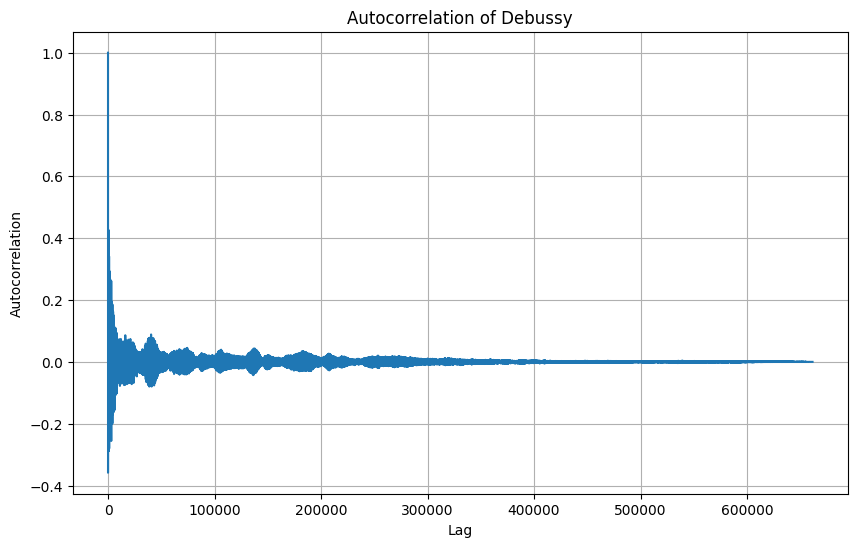

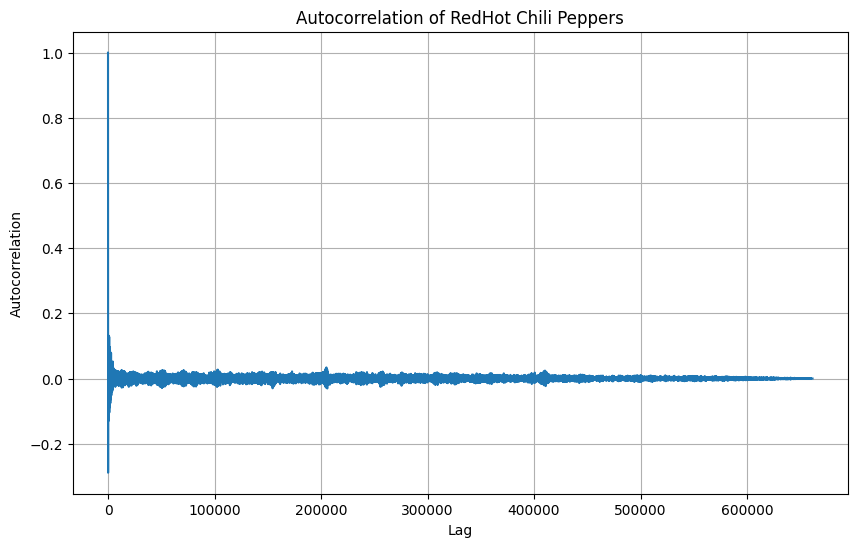

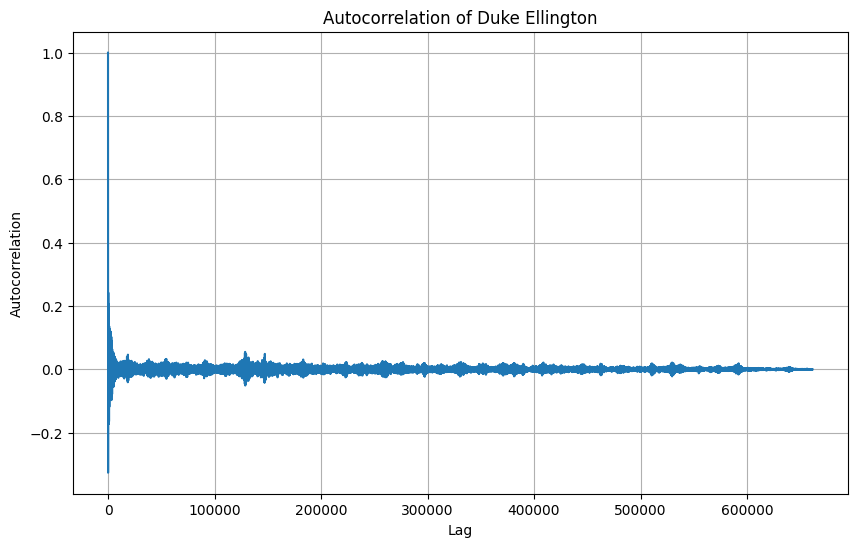

In [35]:
# Function to compute the autocorrelation manually
def autocorrelation(x):
    # Normalize the signal to avoid overflow
    x = x - np.mean(x)
    norm = np.dot(x, x)
    corr = np.correlate(x, x, mode='full') / norm
    return corr[len(corr) // 2:]  # Take the second half (positive lags)

# Function to display the autocorrelation plot
def plot_autocorrelation(signal, title):
    # Calculate autocorrelation using the manual method
    corr = autocorrelation(signal)
    
    plt.figure(figsize=(10, 6))
    plt.plot(corr)
    plt.title(f'Autocorrelation of {title}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

# Plot the autocorrelation for each file
plot_autocorrelation(debussy, "Debussy")
plot_autocorrelation(redhot, "RedHot Chili Peppers")
plot_autocorrelation(duke, "Duke Ellington")

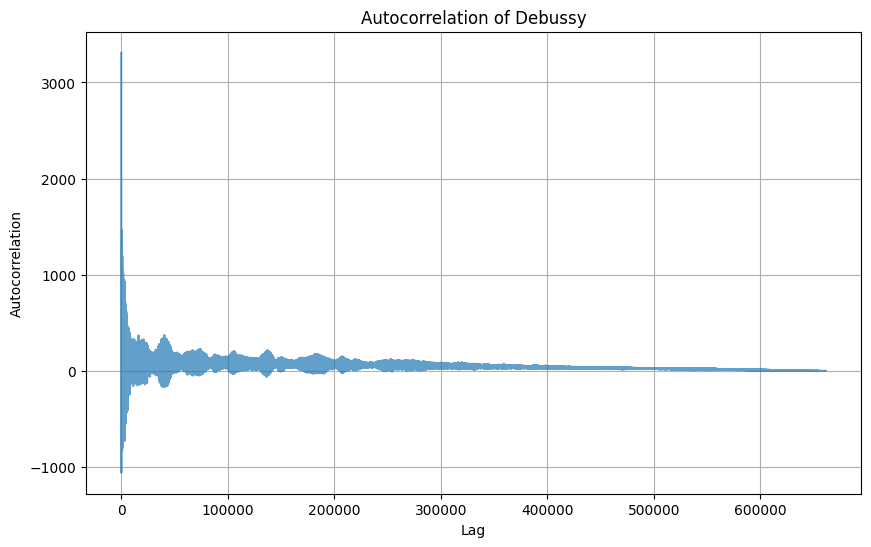

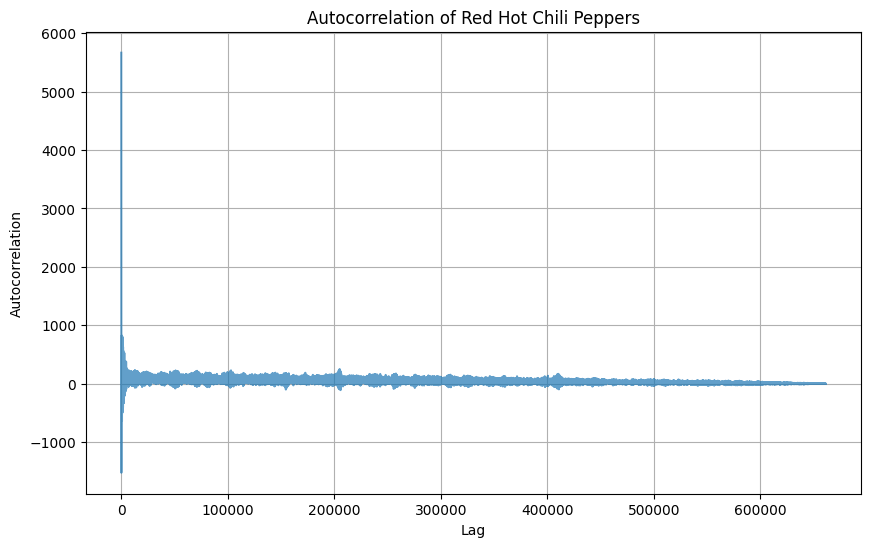

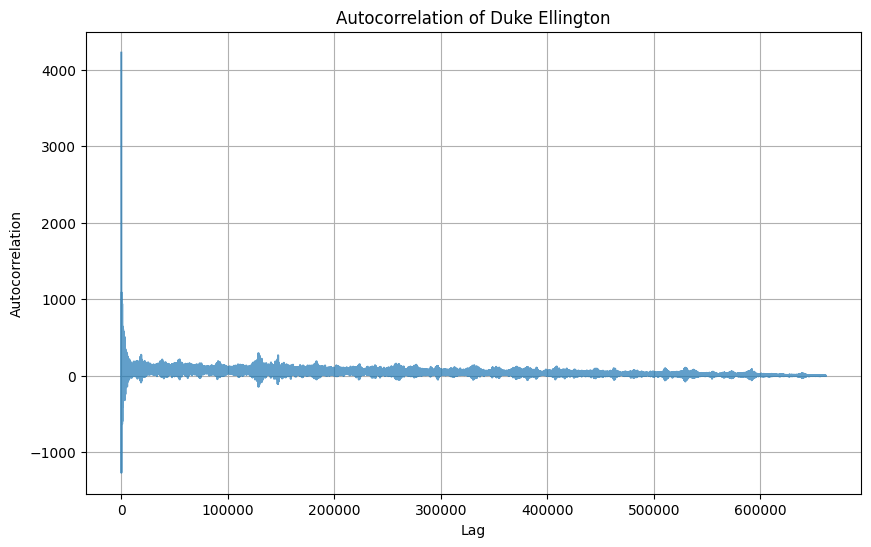

In [8]:
# Function to display the autocorrelation plot using librosa's autocorrelate function
def plot_autocorrelation(signal, title):
    # Calculate autocorrelation using librosa's autocorrelate
    corr = librosa.autocorrelate(signal)
    
    # Plot the autocorrelation using librosa's display module
    plt.figure(figsize=(10, 6))
    plt.plot(corr, alpha=0.7)
    plt.title(f'Autocorrelation of {title}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

# Plot the autocorrelation for each audio file
plot_autocorrelation(debussy, 'Debussy')
plot_autocorrelation(redhot, 'Red Hot Chili Peppers')
plot_autocorrelation(duke, 'Duke Ellington')

Description:
The peak amplitude is the maximum absolute value of the audio waveform. It measures the loudest point in the signal. It can be used to identify the highest point of sound intensity.

The **peak amplitude** of a signal is given by the formula:

$$
A_{\text{peak}} = \max \left( |x(t)| \right)
$$

Where:
- \( A_{\text{peak}} \) is the peak amplitude.
- \( x(t) \) is the signal as a function of time \( t \),
- \( |x(t)| \) denotes the absolute value of the signal.

Use Case:

Commonly used in audio normalization to set consistent volume levels in audio files.

Useful for identifying clipping in audio, which occurs when the signal exceeds the maximum level and distorts.

What is Amplitude? the size or strength of a sound wave.

the amplitude refers to how far the wave moves from its resting point.

Use Case and Application of Peak Amplitude: In Audio Recording/Production, In Sound Systems, In Hearing Tests.

Why It Matters: determine the loudness of a sound. 

if the peak amplitude is too high, it can cause distortion or damage speakers. If it's too low, you may not hear the sound clearly.

Audio Recording and Mixing
Application: In music production, the peak amplitude is crucial for controlling volume levels during recording and mixing.
Use Case: Engineers use peak amplitude meters to ensure that audio recordings do not exceed the maximum allowed levels, avoiding clipping (distortion caused when the amplitude exceeds the limit of the recording system). This is especially important for dynamic range control in mastering tracks, ensuring the sound stays clear and undistorted.

Broadcasting
Application: In radio and television broadcasting, controlling the peak amplitude of the audio signal is vital for maintaining consistent volume levels across different programs.
Use Case: Ensuring the peak amplitude is within a standardized range helps avoid loudness inconsistency, making the broadcast more comfortable for listeners or viewers. Broadcasters aim to avoid sudden jumps in volume by regulating peak amplitude levels.

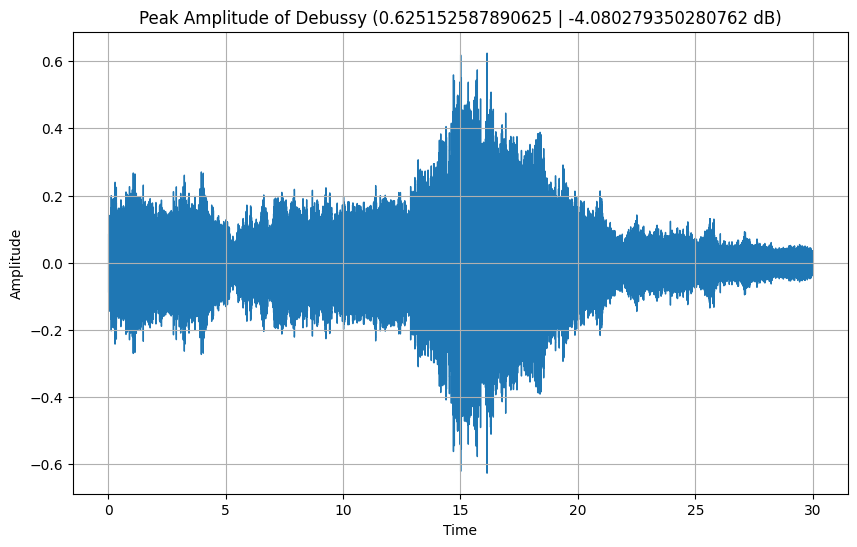

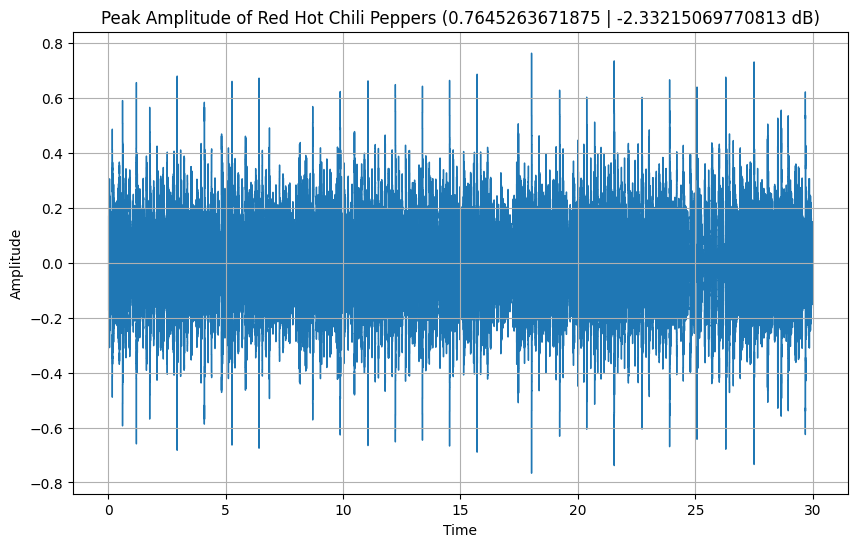

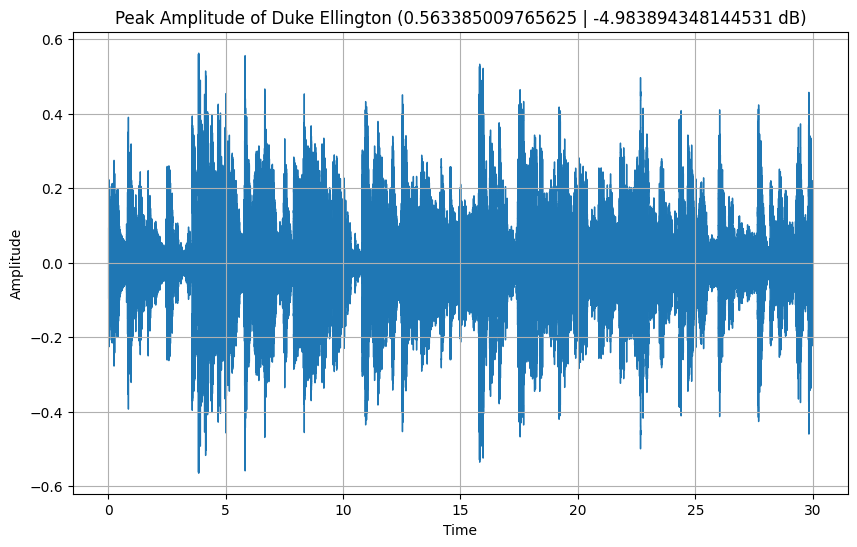

Peak Amplitude for Debussy: 0.625152587890625
Peak Amplitude for Red Hot Chili Peppers: 0.7645263671875
Peak Amplitude for Duke Ellington: 0.563385009765625


In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate and display the peak amplitude using librosa
def peak_amplitude(signal, sr, title):
    # Calculate the peak amplitude directly using librosa's function (just finding max value)
    peak_amplitude = np.max(np.abs(signal))
    
    # Display the amplitude in dB (log scale), to visualize better
    amplitude_db = librosa.amplitude_to_db(np.abs(signal))
    
    # Plot the waveform using librosa's display
    plt.figure(figsize=(10, 6))
    librosa.display.waveshow(signal, sr=sr)
    plt.title(f'Peak Amplitude of {title} ({peak_amplitude} | {np.max(amplitude_db)} dB)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

    # Return the peak amplitude value for further use if needed
    return peak_amplitude

# Calculate and display peak amplitude for each track
peak_amplitude_1 = peak_amplitude(debussy, sr_debussy, 'Debussy')
peak_amplitude_2 = peak_amplitude(redhot, sr_redhot, 'Red Hot Chili Peppers')
peak_amplitude_3 = peak_amplitude(duke, sr_duke, 'Duke Ellington')

# Print the peak amplitudes for each signal
print(f"Peak Amplitude for Debussy: {peak_amplitude_1}")
print(f"Peak Amplitude for Red Hot Chili Peppers: {peak_amplitude_2}")
print(f"Peak Amplitude for Duke Ellington: {peak_amplitude_3}")


Peak Amplitude: 0.625152587890625
Peak Amplitude: 0.7645263671875
Peak Amplitude: 0.563385009765625


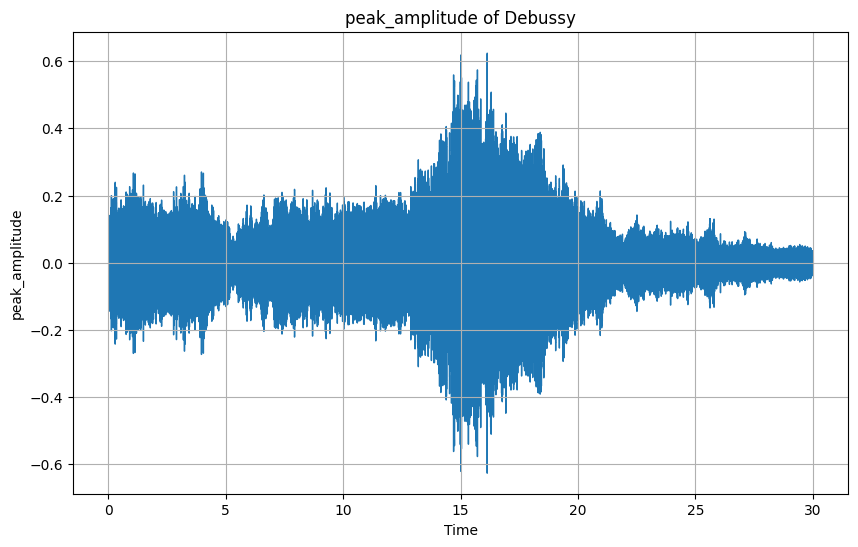

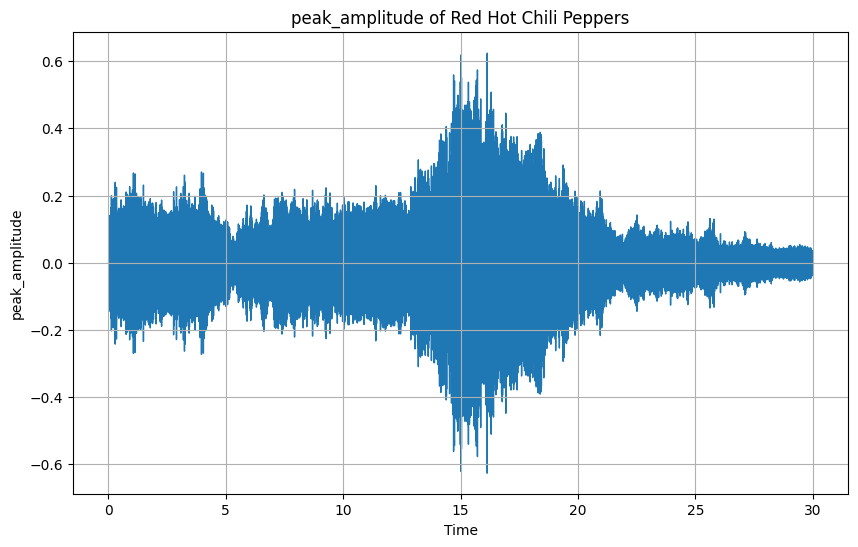

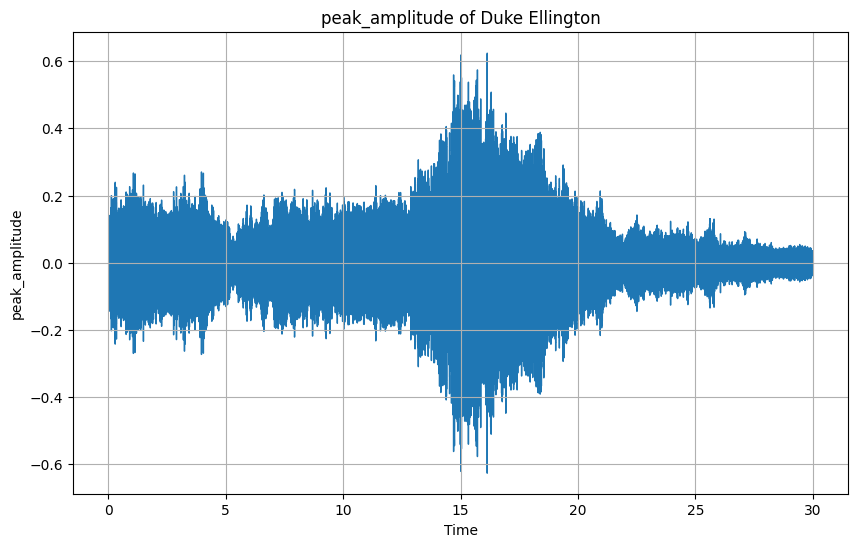

In [11]:
# Calculate the peak amplitude
peak_amplitude_1 = np.max(np.abs(debussy))
peak_amplitude_2 = np.max(np.abs(redhot))
peak_amplitude_3 = np.max(np.abs(duke))

# Print the peak amplitude
print(f"Peak Amplitude: {peak_amplitude_1}")
print(f"Peak Amplitude: {peak_amplitude_2}")
print(f"Peak Amplitude: {peak_amplitude_3}")

# Function to display the autocorrelation plot using librosa's autocorrelate function
def peak_amplitude(signal, sr, title):
    # Calculate autocorrelation using librosa's autocorrelate
    np.max(np.abs(signal))
    
    # Plot the autocorrelation using librosa's display module
    plt.figure(figsize=(10, 6))
    librosa.display.waveshow(debussy, sr=sr)
    plt.title(f'peak_amplitude of {title}')
    plt.ylabel('peak_amplitude')
    plt.grid(True)
    plt.show()

# Plot the autocorrelation for each audio file
peak_amplitude(debussy, sr_debussy, 'Debussy')
peak_amplitude(redhot, sr_redhot, 'Red Hot Chili Peppers')
peak_amplitude(duke, sr_duke, 'Duke Ellington')

Description: Skewness measures the asymmetry of the signal's waveform distribution. A positive skew indicates that the signal has a long right tail, while a negative skew indicates a long left tail.

Use case: 

Skewness is used in audio signal characterization and classification tasks, especially in speech and music genre classification.

It can provide insight into the distribution of audio signal values, which can be indicative of certain signal types or emotions.

The formula for skewness is given by:

$$
\text{Skewness} = \frac{(N-1)(N-2)}{N} \sum_{i=1}^{N} \frac{(x_i - \mu)^3}{\sigma^3}
$$

Where:

- \( N \) = number of audio samples.
- \( x_i \) = individual audio sample values.
- \( \mu \) = mean of the audio samples.
- \( \sigma \) = standard deviation of the audio samples.


What is Skewness in Sound? 

skewness refers to the asymmetry or "tilt" of a sound wave's amplitude distribution.

skewness measures the balance or imbalance of the shape of the waveform.

Positive Skew Sound: The bell rings and has a sharp, sudden, and loud initial "hit," with a slow tail-off.

Waveform: The sound's waveform will have a quick rise (high intensity) followed by a slow decay.

Skewness: The waveform's right side will be stretched out, and the left side will have a quick drop. This is a positive skew.

Negative Skew Sound: The bell rings, but its sound is more gradual, building up quickly and then sharply cutting off.

Waveform: The waveform will show a slow start and a quick fall-off.

Skewness: The left side of the waveform will stretch out, and the right side will drop off sharply. This is a negative skew.

Use Case and Application

Music Production

Voice Processing

Speech Recognition

Acoustic Analysis

peech Recognition and Analysis:
Application: In speech recognition systems, audio signals are often analyzed for their statistical properties to improve recognition accuracy. Skewness can be used to distinguish between different types of speech sounds or vocal patterns.
Use Case: Skewness might help to differentiate between voiced (normal speech) and unvoiced (e.g., whispered speech) sounds. Positive or negative skewness could indicate specific speech characteristics, aiding algorithms in distinguishing phonemes or identifying speech tone.

Audio Compression:
Application: Skewness can be utilized in audio compression algorithms to optimize file sizes without losing significant quality. Audio with a high positive or negative skew might compress differently than a symmetrical audio file.
Use Case: By analyzing the skewness of an audio waveform, a codec can adjust the encoding algorithm to better preserve or compress certain aspects of the audio (like reducing background noise or enhancing speech clarity).

Skewness of Debussy Audio: 0.02601500228047371
Skewness of Redhot Audio: -0.04115254804491997
Skewness of Duke Audio: 0.10423169285058975


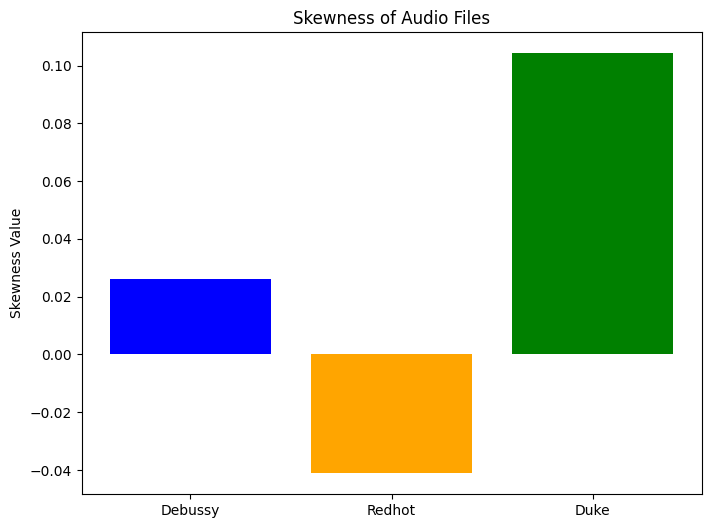

In [ ]:
# Function to compute skewness manually
def compute_skewness_manual(x):
    N = len(x)
    mean_x = np.mean(x)
    std_x = np.std(x)

    # Calculate the third central moment
    third_moment = np.sum((x - mean_x)**3) / N

    # Calculate skewness
    skewness = third_moment / (std_x**3)
    
    return skewness

# Compute skewness for each audio signal
debussy_skew = compute_skewness_manual(debussy_audio)
redhot_skew = compute_skewness_manual(redhot_audio)
duke_skew = compute_skewness_manual(duke_audio)

# Print skewness for each audio file
print(f"Skewness of Debussy Audio: {debussy_skew}")
print(f"Skewness of Redhot Audio: {redhot_skew}")
print(f"Skewness of Duke Audio: {duke_skew}")

# Plot the skewness for the three audio files
skewness_values = [debussy_skew, redhot_skew, duke_skew]
audio_titles = ["Debussy", "Redhot", "Duke"]

plt.figure(figsize=(8, 6))
plt.bar(audio_titles, skewness_values, color=['blue', 'orange', 'green'])
plt.title('Skewness of Audio Files')
plt.ylabel('Skewness Value')
plt.show()

Skewness of Debussy Audio: 0.02601500228047371
Skewness of Redhot Audio: -0.04115254804491997
Skewness of Duke Audio: 0.10423169285058975


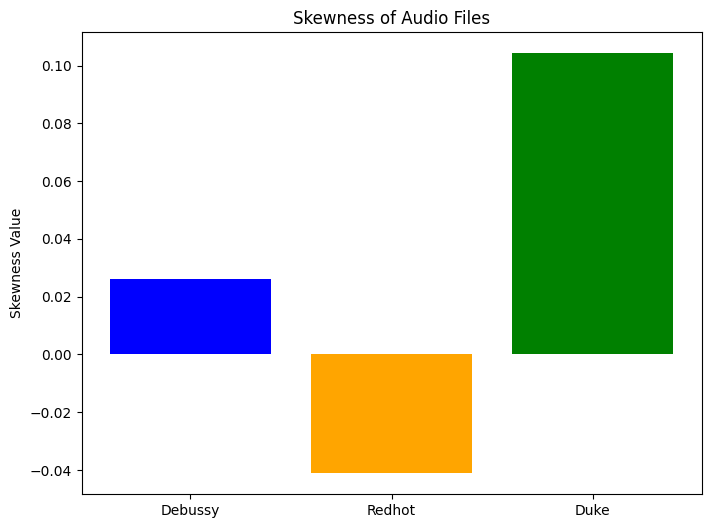

In [14]:
from scipy.stats import skew

# Compute skewness for each audio signal using scipy's skew function
debussy_skew = skew(debussy_audio)
redhot_skew = skew(redhot_audio)
duke_skew = skew(duke_audio)

# Print skewness for each audio file
print(f"Skewness of Debussy Audio: {debussy_skew}")
print(f"Skewness of Redhot Audio: {redhot_skew}")
print(f"Skewness of Duke Audio: {duke_skew}")

# Plot the skewness for the three audio files
skewness_values = [debussy_skew, redhot_skew, duke_skew]
audio_titles = ["Debussy", "Redhot", "Duke"]

plt.figure(figsize=(8, 6))
plt.bar(audio_titles, skewness_values, color=['blue', 'orange', 'green'])
plt.title('Skewness of Audio Files')
plt.ylabel('Skewness Value')
plt.show()

Kurtosis

Description:
Kurtosis measures the "tailedness" or sharpness of the peak of the waveform's probability distribution. High kurtosis means the waveform has sharp peaks, while low kurtosis suggests that the waveform has a flatter distribution.

Use Case:

Used in audio signal analysis to characterize the texture of sound. Sounds with high kurtosis may be more percussive or sharp.
Important in detecting sound events, such as claps or drum hits, in audio processing.

The formula for kurtosis is given by:

$$
\text{Kurtosis} = \frac{(N-2)(N-3)}{N(N-1)} \sum_{i=1}^{N} \frac{(x_i - \mu)^4}{\sigma^4} - 3
$$

Where:

- \( N \) = number of audio samples.
- \( x_i \) = individual audio sample values.
- \( \mu \) = mean of the audio samples.
- \( \sigma \) = standard deviation of the audio samples.

The subtraction of 3 at the end makes the formula excess kurtosis, which simplifies the interpretation (a normal distribution has a kurtosis of 0).


Kurtosis in sound refers to how "peaked" or "flat" the sound waves are, in terms of their amplitude variations over time.

What is Kurtosis in Sound?

Kurtosis is a statistical measure that describes the shape of a distribution of data.

In the context of sound, it specifically refers to the distribution of sound amplitudes (volume levels) over time. 

Kurtosis describes the "outliers" of a sound signal — how extreme the loudest parts of the sound are compared to its normal state.

How Kurtosis Affects Sound:

Positive Kurtosis (high kurtosis): The sound has sharp, extreme variations in loudness, creating more "unexpected" loud moments (like a loud clap or a sudden horn).

Negative Kurtosis (low kurtosis): The sound has a smoother, more uniform amplitude without large, unexpected changes (like ambient background noise).

Use Case of Kurtosis in Sound

Audio Signal Processing

Speech Recognition

Noise Detection

Music Production

Why It Matters

High kurtosis in sound means there's more "energy" or sudden peaks in the sound. For certain applications like percussion music or action movie soundtracks, this can make the sound feel exciting and intense.

Low kurtosis can make sound feel softer and more ambient, useful in settings like ambient music or background sound for movies.

Speech Processing and Recognition:
Application: In speech recognition, kurtosis is used to detect unusual or sharp variations in speech sounds that may affect the accuracy of recognition algorithms.
Use Case: High kurtosis in speech could indicate a presence of sharp, sudden sounds (like a cough or gasp) or abnormal variations in volume. This could be used to help speech recognition systems ignore or process noise, or to detect specific speech patterns that may be useful for improving speech-to-text systems.

Music Production (Audio Mixing and Mastering):
Application: In music production, kurtosis can help engineers understand the nature of the waveform and adjust its dynamics accordingly. High kurtosis indicates that the waveform has sharper peaks (more "spiky"), while low kurtosis indicates a smoother waveform.
Use Case: If a track has very high kurtosis, it could mean that certain parts of the audio (e.g., percussive hits or sudden peaks) are too sharp or have too much "clipping." Producers use this information to smooth out or compress these peaks, ensuring the track doesn't have overly harsh sounds.

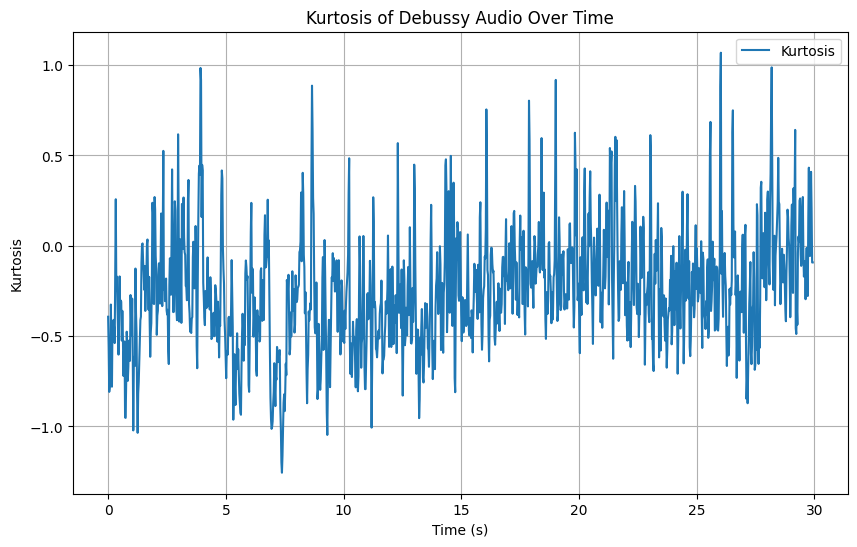

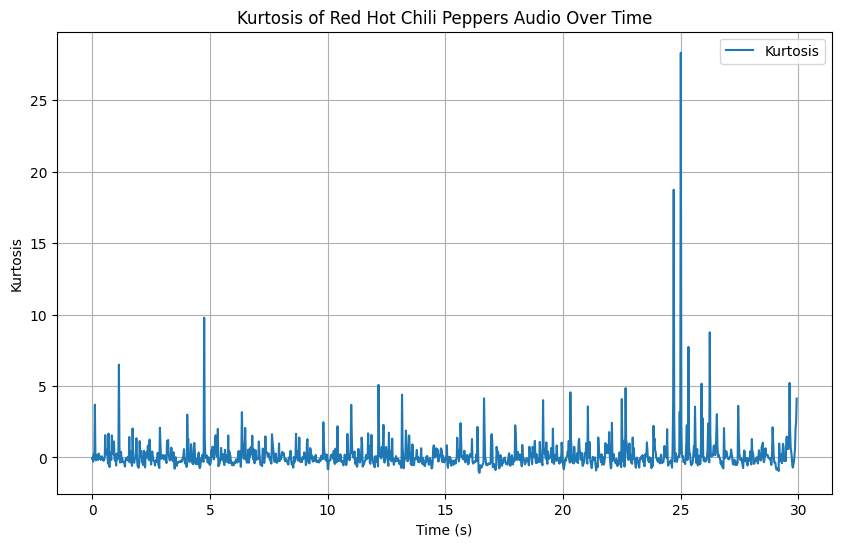

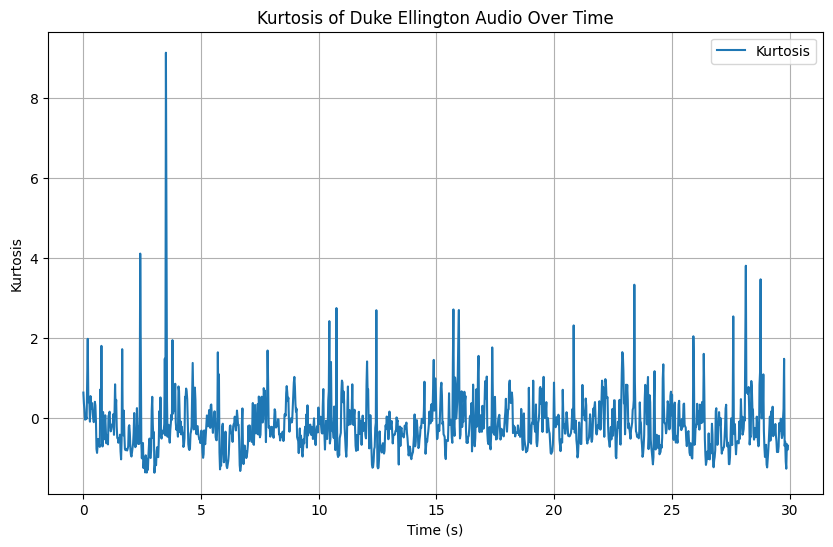

In [15]:
# Function to compute kurtosis manually for a signal
def compute_kurtosis_manual(x):
    N = len(x)
    mean_x = np.mean(x)
    std_x = np.std(x)

    # Calculate the fourth central moment
    fourth_moment = np.sum((x - mean_x)**4) / N

    # Calculate kurtosis (excess kurtosis is subtracted for unbiased estimation)
    kurtosis_value = (fourth_moment / (std_x**4)) - 3
    
    return kurtosis_value

# Plot the kurtosis over time
def plot_kurtosis(signal, sr, title):
    # Define parameters for the sliding window
    window_size = 1024  # Size of each window (samples)
    hop_length = 512    # Hop length (stride between consecutive windows)
    y = signal

    # Initialize an empty list to store kurtosis values
    kurtosis_values = []

    # Process the audio signal in overlapping windows
    for i in range(0, len(y) - window_size, hop_length):
        window = y[i:i + window_size]
        window_kurtosis = compute_kurtosis_manual(window)  # Use the manual kurtosis function
        kurtosis_values.append(window_kurtosis)

    # Time axis for plotting the kurtosis values
    time_axis = librosa.frames_to_time(range(len(kurtosis_values)), sr=sr, hop_length=hop_length)

    # Plot the kurtosis over time
    plt.figure(figsize=(10, 6))
    plt.plot(time_axis, kurtosis_values, label='Kurtosis', color='tab:blue')
    plt.title(f'Kurtosis of {title} Audio Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Kurtosis')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot the kurtosis of the audio signals
plot_kurtosis(debussy_audio, sr_debussy, 'Debussy')
plot_kurtosis(redhot_audio, sr_redhot, 'Red Hot Chili Peppers')
plot_kurtosis(duke_audio, sr_duke, 'Duke Ellington')

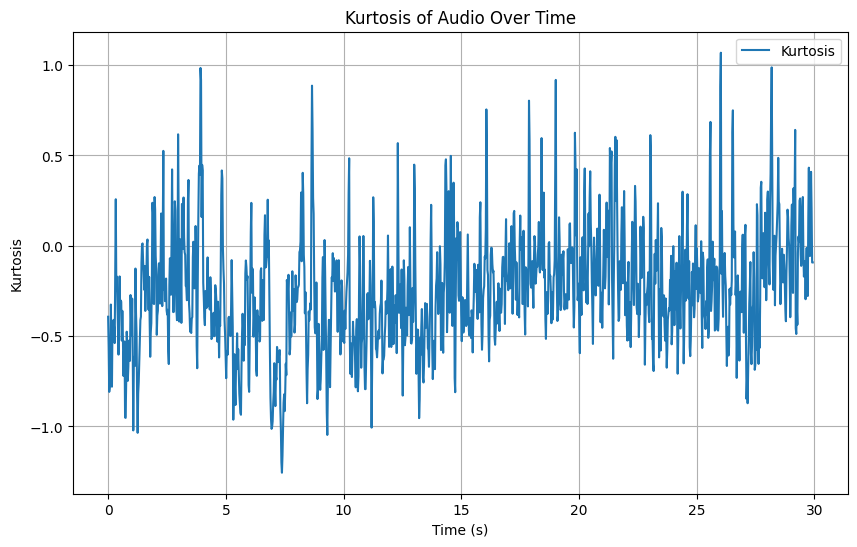

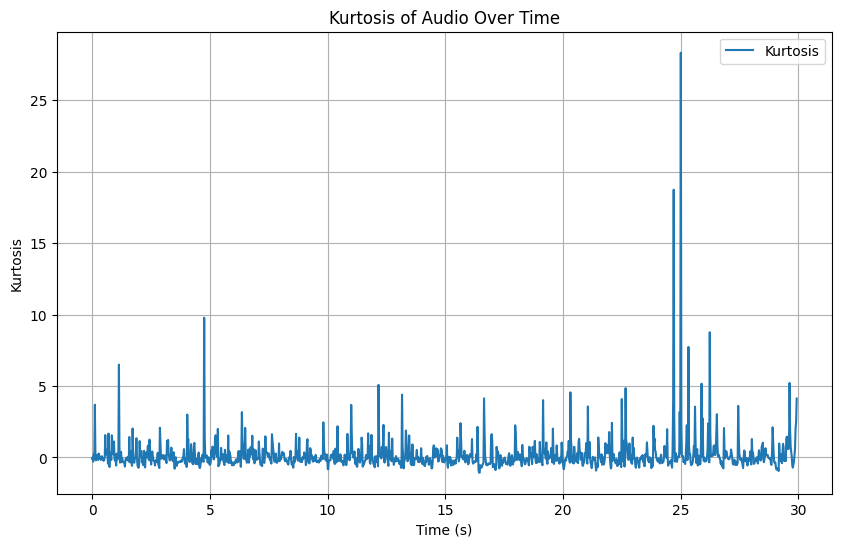

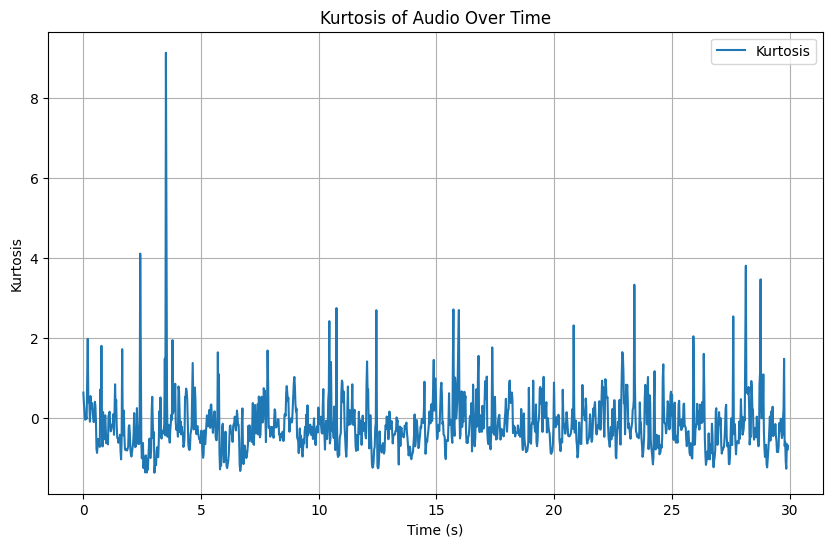

In [20]:
def plot_skewness(signal, sr, title):
    # Define parameters for the sliding window
    window_size = 1024  # Size of each window (samples)
    hop_length = 512    # Hop length (stride between consecutive windows)
    y = signal

    # Initialize an empty list to store kurtosis values
    kurtosis_values = []


    # Process the audio signal in overlapping windows
    for i in range(0, len(y) - window_size, hop_length):
        window = y[i:i + window_size]
        window_kurtosis = kurtosis(window)
        kurtosis_values.append(window_kurtosis)

    # Time axis for plotting the kurtosis values
    time_axis = librosa.frames_to_time(range(len(kurtosis_values)), sr=sr, hop_length=hop_length)

    # Plot the kurtosis over time
    plt.figure(figsize=(10, 6))
    plt.plot(time_axis, kurtosis_values, label='Kurtosis', color='tab:blue')
    plt.title('Kurtosis of Audio Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Kurtosis')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot the kurtosis of the audio signals
plot_skewness(debussy, sr_debussy, 'Debussy')
plot_skewness(redhot, sr_redhot, 'Red Hot Chili Peppers')
plot_skewness(duke, sr_duke, 'Duke Ellington')

Cross-correlation

Description:
Cross-correlation measures the similarity between two signals at different time lags. It is used to detect periodic patterns, such as repeating sounds or rhythms.

Use Case:

Commonly used in detecting synchronized sounds in multiple channels (e.g., stereo sound analysis or multi-microphone arrays).
In speech recognition, it is used to align signals from different sources (e.g., finding where one speech signal starts in a noisy background).

The cross-correlation formula for two signals \( x(t) \) and \( y(t) \) is defined as:

$$
R_{xy}(\tau) = \sum_t x(t) \cdot y(t + \tau)
$$

Where:

- \( R_{xy}(\tau) \) is the cross-correlation function at time-lag \( \tau \).
- \( x(t) \) and \( y(t) \) are the two signals being compared (which could represent audio samples).
- \( \tau \) is the time-lag or shift applied to one of the signals (usually the second signal, \( y(t) \)).
- The summation is taken over all values of \( t \), which represents the time window of the signals.


Cross-correlation amplitude refers to the value that indicates how similar two signals are at a given point in time when they are shifted relative to each other. The amplitude is a measure of the strength of the correlation.

The peak of the cross-correlation function tells you the time shift (or lag) where the signals align best. The amplitude at this peak tells you how strong the alignment is.

Use Case and Application:

Echo Detection

Speech Recognition

Music and Sound Synchronization

Time-of-Flight (TOF) Measurement

Audio Synchronization (Aligning Two Audio Tracks):
Application: In music production, cross-correlation can be used to synchronize multiple audio tracks or align audio samples that are slightly out of phase.
Use Case: When creating a multi-track recording, engineers can use cross-correlation to automatically align tracks that are recorded at different times (e.g., separate vocal and instrumental recordings), ensuring the timing is perfect. If two tracks are off by a small amount, cross-correlation will show the time shift required to align them correctly.

Speech Recognition and Speaker Identification:
Application: Cross-correlation is used in speech recognition systems to compare the similarity between a known speech pattern and an incoming speech signal.
Use Case: For speaker identification, cross-correlation can help match a new speech sample to a pre-recorded voice sample (template) by comparing the waveform of the two signals. The system can determine how similar the new input is to a specific speaker, helping in applications like voice-controlled assistants or security systems.

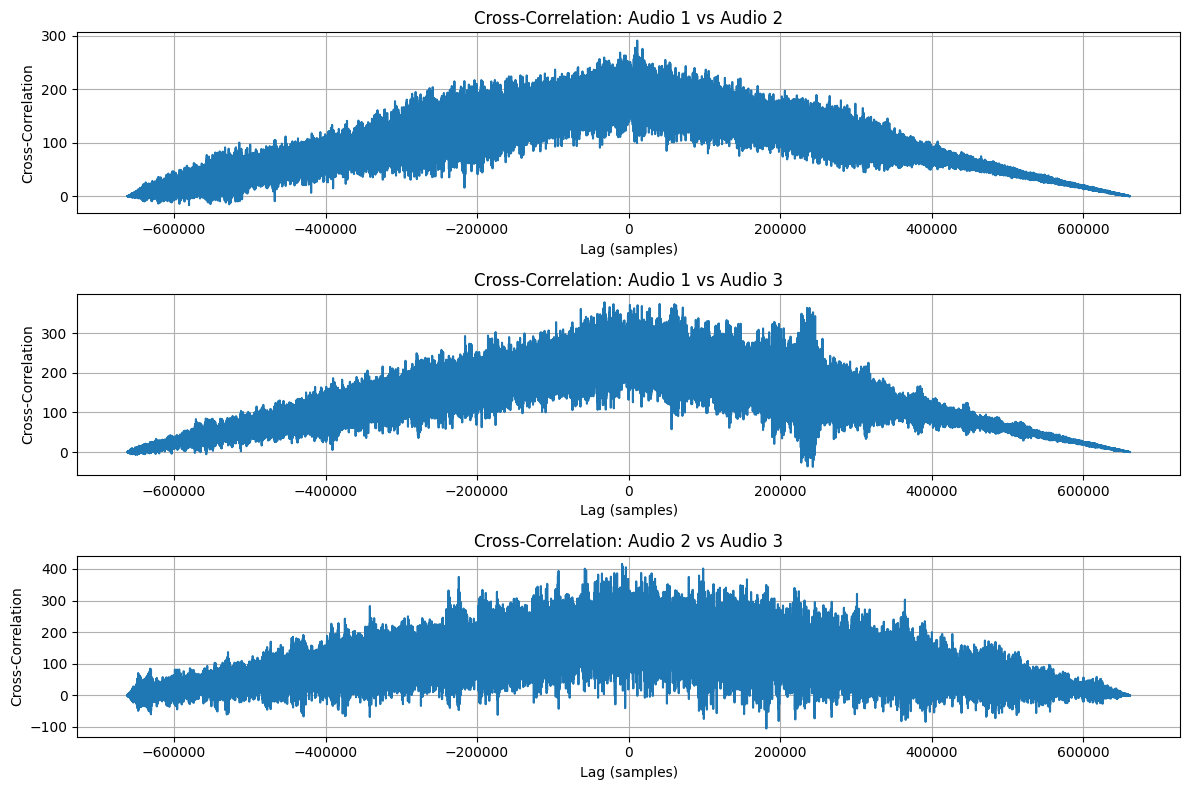

In [25]:
# Ensure all audio files have the same sample rate
if sr_debussy != sr_redhot or sr_redhot != sr_duke:
    raise ValueError("The sample rates of the audio files are different.")

y1 = debussy
y2 = redhot
y3 = duke

# Normalize the signals to avoid any large amplitude differences
y1 = y1 / np.max(np.abs(y1))
y2 = y2 / np.max(np.abs(y2))
y3 = y3 / np.max(np.abs(y3))

# Ensure all signals have the same length by trimming or padding
min_length = min(len(y1), len(y2), len(y3))
y1 = y1[:min_length]
y2 = y2[:min_length]
y3 = y3[:min_length]

# Compute cross-correlation for the three pairs of audio files
cross_corr_1_2 = correlate(y1, y2, mode='full')
cross_corr_1_3 = correlate(y1, y3, mode='full')
cross_corr_2_3 = correlate(y2, y3, mode='full')

# Create a time axis based on the length of the cross-correlation results
lags = np.arange(-min_length + 1, min_length)

# Plot the cross-correlation between the pairs of audio files
plt.figure(figsize=(12, 8))

# Cross-correlation between audio_file_1 and audio_file_2
plt.subplot(3, 1, 1)
plt.plot(lags, cross_corr_1_2)
plt.title('Cross-Correlation: Audio 1 vs Audio 2')
plt.xlabel('Lag (samples)')
plt.ylabel('Cross-Correlation')
plt.grid(True)

# Cross-correlation between audio_file_1 and audio_file_3
plt.subplot(3, 1, 2)
plt.plot(lags, cross_corr_1_3)
plt.title('Cross-Correlation: Audio 1 vs Audio 3')
plt.xlabel('Lag (samples)')
plt.ylabel('Cross-Correlation')
plt.grid(True)

# Cross-correlation between audio_file_2 and audio_file_3
plt.subplot(3, 1, 3)
plt.plot(lags, cross_corr_2_3)
plt.title('Cross-Correlation: Audio 2 vs Audio 3')
plt.xlabel('Lag (samples)')
plt.ylabel('Cross-Correlation')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# Frequency Domain Features 

Description: Spectral centroid indicates the "center of mass" of the spectrum, often corresponding to the perceived brightness of the sound.

Use Case: 

Used in music genre classification, sound texture analysis, and audio segmentation to characterize the timbral texture of an audio signal.

The formula to compute the spectral centroid is:

$$
C = \frac{\sum f \cdot S(f)}{\sum S(f)}
$$

Where:

- \( C \) = Spectral centroid.
- \( f \) = Frequency bins.
- \( S(f) \) = Amplitude (or power) of the frequency component at frequency \( f \).

The summation is over all frequency bins (typically the ones computed from the Fast Fourier Transform, or FFT).


What is Spectral Centroid?

The spectral centroid is a feature used to describe the "brightness" or "sharpness" of a sound. It's based on the frequency distribution of a sound and gives us an idea of where the center of the spectrum (range of frequencies) is located.

it tells us where the "average" frequency of the sound lies. Sounds with high spectral centroid values are typically perceived as brighter (sharp, high-pitched), while those with low values are perceived as darker (mellow, low-pitched).

Example to Understand Spectral Centroid:
Imagine two musical notes:

A bright sound: Think of a high-pitched sound, like a bell ringing or a flute playing a high note.

This sound will have a high concentration of high frequencies, so the spectral centroid will be located towards the higher end of the frequency spectrum.
A dark sound: Think of a low-pitched sound, like a bass drum or a deep growl.

This sound will have more low frequencies, and the spectral centroid will be located towards the lower end of the frequency spectrum.
In simple terms:

High spectral centroid = Bright, sharp sound.
Low spectral centroid = Dark, deep sound.

How is Spectral Centroid Calculated?

Break the sound into frequency components

Weight each frequency

Calculate the center of mass

Use Case and Applications

Music Production

Speech Recognition

Audio Classification and Tagging

Real-Time Audio Effects

Sonification

Music Genre Classification:
Application: Spectral centroid is commonly used in music genre classification systems, as different genres tend to have different spectral profiles.
Use Case: Genres like classical music, which often have more low-frequency content, will have a lower spectral centroid, while rock or electronic music, which may have more high-frequency content, will have a higher spectral centroid. By analyzing the spectral centroid, classifiers can distinguish between different genres of music or detect shifts in musical style.

Timbre Analysis and Sound Design:
Application: In sound design and music production, spectral centroid is used to characterize the timbre of an instrument or voice.
Use Case: When designing sounds for synthesizers or analyzing acoustic instruments, the spectral centroid can help determine whether the sound is bright (high centroid) or dark (low centroid). For example, a violin has a higher spectral centroid than a bass guitar, making it a useful tool for sound designers and mixing engineers to shape sound texture.

Speech Processing and Speaker Identification:
Application: Spectral centroid is used in speech processing to analyze and distinguish between different speakers or speech patterns.
Use Case: When identifying a speaker or differentiating between speech sounds, the spectral centroid can help to highlight the "brightness" of certain speech phonemes. For example, the centroid will differ when distinguishing between higher-frequency consonants like "s" or "sh" (which have a higher spectral centroid) and lower-frequency vowels (which have a lower spectral centroid). This can be useful for applications like speaker recognition or emotion detection in speech.

[ 953.00239574  986.00813607  974.08757994 ... 1839.90007711 1749.33267494
 1586.83573137]
[3289.98418899 3042.94393118 2647.30782268 ... 3953.55778087 3969.56074201
 3226.701043  ]
[1841.9073738  1611.28559336 1382.90990727 ...  725.26356785  733.31135034
 1012.44599675]


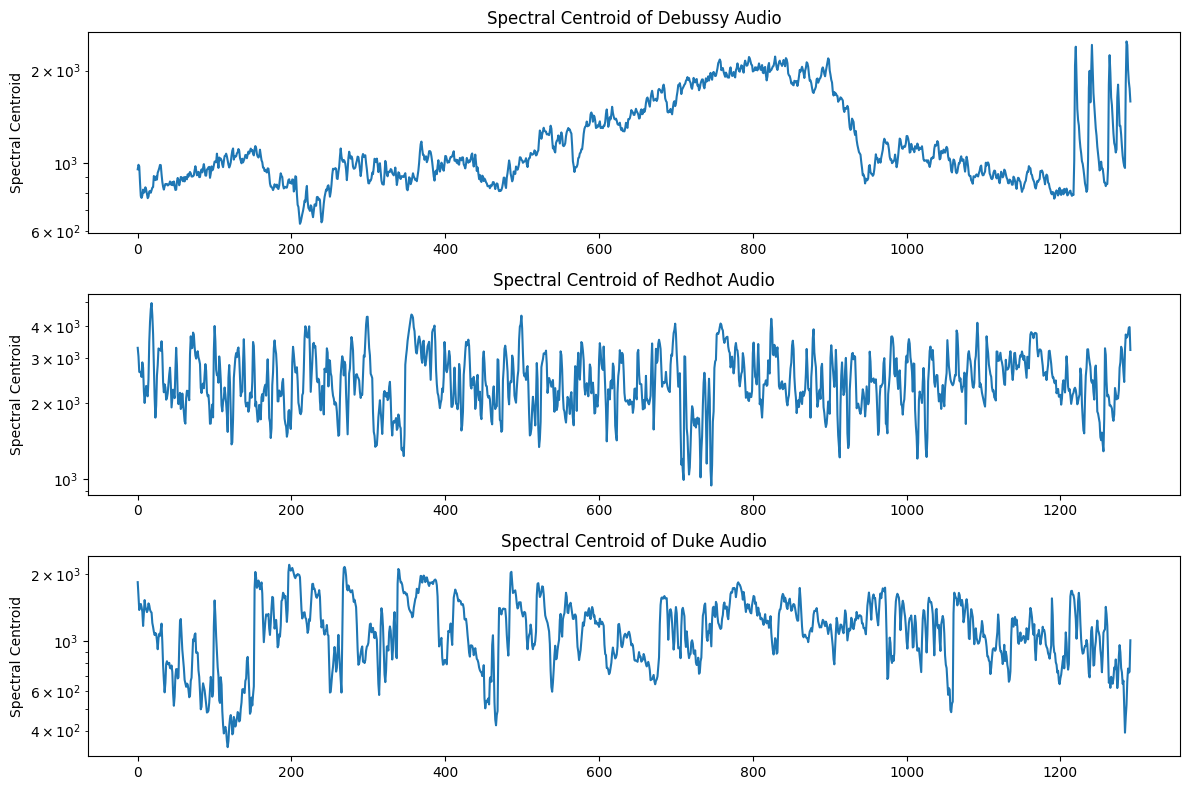

In [41]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

# Define file paths for the audio files
debussy_file = "audio/debussy.wav"
redhot_file = "audio/redhot.wav"
duke_file = "audio/duke.wav"

# Load the audio files with their sample rates
debussy_audio, sr_debussy = librosa.load(debussy_file, sr=None)
redhot_audio, sr_redhot = librosa.load(redhot_file, sr=None)
duke_audio, sr_duke = librosa.load(duke_file, sr=None)

# Normalize the audio signals
debussy_audio = librosa.util.normalize(debussy_audio)
redhot_audio = librosa.util.normalize(redhot_audio)
duke_audio = librosa.util.normalize(duke_audio)

# Compute the spectral centroid for each audio file using librosa's built-in function
debussy_centroid = librosa.feature.spectral_centroid(y=debussy_audio, sr=sr_debussy)[0]
redhot_centroid = librosa.feature.spectral_centroid(y=redhot_audio, sr=sr_redhot)[0]
duke_centroid = librosa.feature.spectral_centroid(y=duke_audio, sr=sr_duke)[0]

print(debussy_centroid)
print(redhot_centroid)
print(duke_centroid)

# Plot the spectral centroid for each audio file
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.semilogy(debussy_centroid)
plt.ylabel('Spectral Centroid')
plt.title('Spectral Centroid of Debussy Audio')

plt.subplot(3, 1, 2)
plt.semilogy(redhot_centroid)
plt.ylabel('Spectral Centroid')
plt.title('Spectral Centroid of Redhot Audio')

plt.subplot(3, 1, 3)
plt.semilogy(duke_centroid)
plt.ylabel('Spectral Centroid')
plt.title('Spectral Centroid of Duke Audio')

plt.tight_layout()
plt.show()

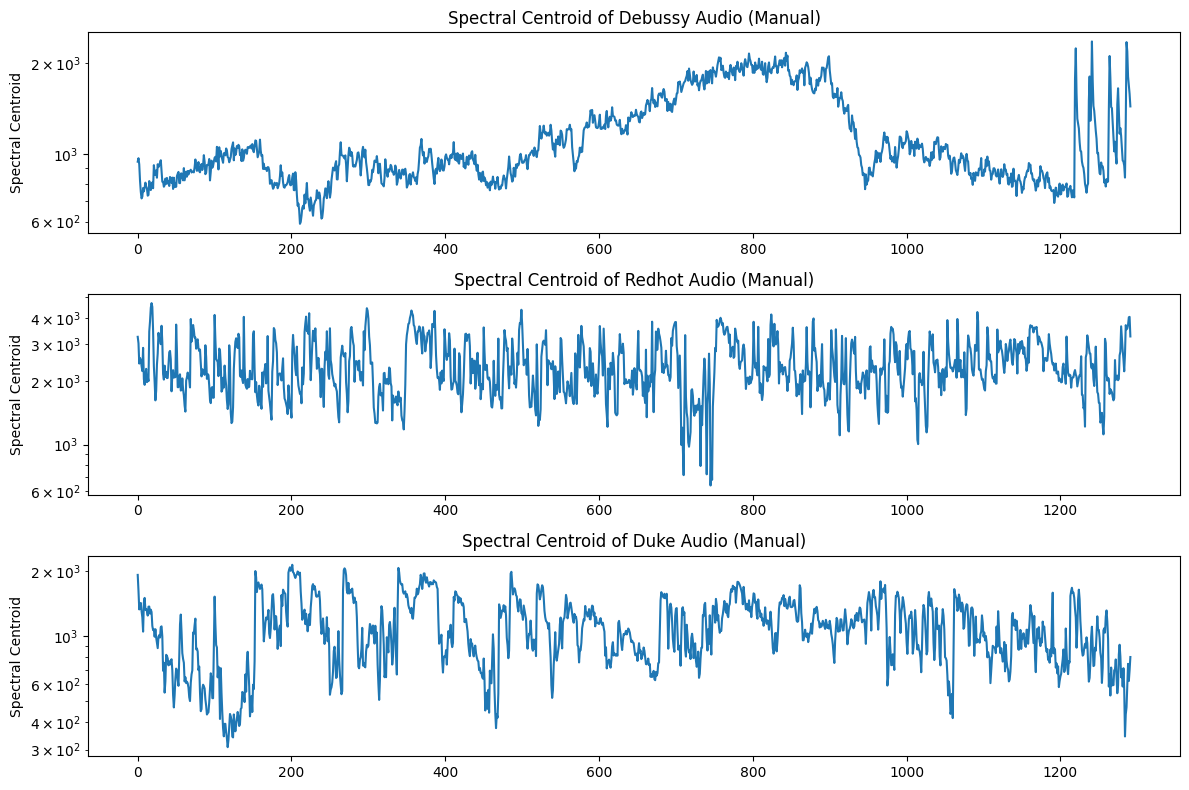

In [20]:
# Function to calculate spectral centroid manually
def manual_spectral_centroid(audio, sr, n_fft=1024, hop_length=512):
    # Compute the STFT
    D = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
    
    # Compute the magnitude (take absolute value of the complex spectrogram)
    magnitude = np.abs(D)
    
    # Calculate the frequency bins
    freqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    
    # Reshape freqs to match the shape of magnitude for broadcasting
    freqs = freqs[:, np.newaxis]
    
    # Calculate spectral centroid for each frame
    spectral_centroid = np.sum(freqs * magnitude, axis=0) / np.sum(magnitude, axis=0)
    
    return spectral_centroid

# Calculate the spectral centroid manually
debussy_centroid_manual = manual_spectral_centroid(debussy, sr_debussy)
redhot_centroid_manual = manual_spectral_centroid(redhot, sr_redhot)
duke_centroid_manual = manual_spectral_centroid(duke, sr_duke)

# Plot the spectral centroid manually for each audio file
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.semilogy(debussy_centroid_manual)
plt.ylabel('Spectral Centroid')
plt.title('Spectral Centroid of Debussy Audio (Manual)')

plt.subplot(3, 1, 2)
plt.semilogy(redhot_centroid_manual)
plt.ylabel('Spectral Centroid')
plt.title('Spectral Centroid of Redhot Audio (Manual)')

plt.subplot(3, 1, 3)
plt.semilogy(duke_centroid_manual)
plt.ylabel('Spectral Centroid')
plt.title('Spectral Centroid of Duke Audio (Manual)')

plt.tight_layout()
plt.show()

Spectral Flux

Description: Spectral flux measures the rate of change in the spectrum over time, indicating how rapidly the frequency content of a sound is changing.

Use Case:
In music, it can be used for detecting percussive events or beats, as percussive sounds often have high spectral flux due to rapid changes in their frequency content.
In audio event detection, high spectral flux can indicate the presence of transient sounds, like clicks or pops.

The formula for calculating spectral flux is:

$$
\text{Spectral Flux}(t) = \sum_f \left| S(f, t) - S(f, t-1) \right|
$$

Where:

- \( S(f, t) \) is the magnitude of the frequency component \( f \) at time \( t \), typically obtained using a Short-Time Fourier Transform (STFT).
- \( S(f, t-1) \) is the magnitude of the frequency component \( f \) at the previous time step \( t-1 \).
- The summation is done across all frequency bins \( f \).


What is Spectral Flux Amplitude in Sound?

Spectral Flux amplitude is a concept used to describe how much the frequency content of a sound changes over time. In simpler terms, it measures how the shape of the sound spectrum (or how different frequencies are present in the sound) varies from one moment to the next.

Breaking It Down:

Spectrum of Sound: When we analyze sound, we can break it down into different frequencies (like low bass, midrange, and high treble). The collection of all these frequencies at any given time is called the spectrum of sound.

Spectral Flux: Spectral Flux measures the difference between the spectrum of sound at one time and the spectrum at the next moment in time. If the sound's frequency content (or the combination of low, mid, and high frequencies) changes rapidly, the spectral flux value will be high. If the sound stays constant, the flux value will be low.

Low Spectral Flux: A single note from the guitar that doesn't change much.

High Spectral Flux: When the guitarist strums several strings, creating a more complex and rapidly changing sound.

How to Calculate Spectral Flux:

Divide the sound into small time frames (called windows).

Calculate the frequency spectrum (using something like the Fourier Transform) for each frame.

Compare the spectra of consecutive frames. The difference in the frequency content from one frame to the next gives you the spectral flux.

Use Cases and Applications:

Music and Sound Analysis

Audio Processing and Compression

Speech and Voice Recognition

Noise Detection

Audio Effects and Synthesis

Music Beat Detection:
Application: Spectral flux is often used in beat detection algorithms to identify onsets or rhythmic events in music.
Use Case: In music, the spectral flux increases when a beat or musical onset occurs because there is a sudden change in the frequency content (for example, when a drum hit is played). By measuring spectral flux over time, algorithms can detect these "onsets" or "beats" in the music, which is useful in applications like beat tracking, dance music visualization, and DJing software.

Audio Segmentation and Transition Detection:
Application: Spectral flux helps identify transitions or boundaries in an audio signal, such as between different sections of a song (verse to chorus) or between different sound events.
Use Case: In audio segmentation tasks, spectral flux can detect significant changes in sound. For example, a sudden change in spectral flux could indicate the start of a new musical section or an abrupt change in environmental sounds, like moving from a quiet environment to a loud sound event.

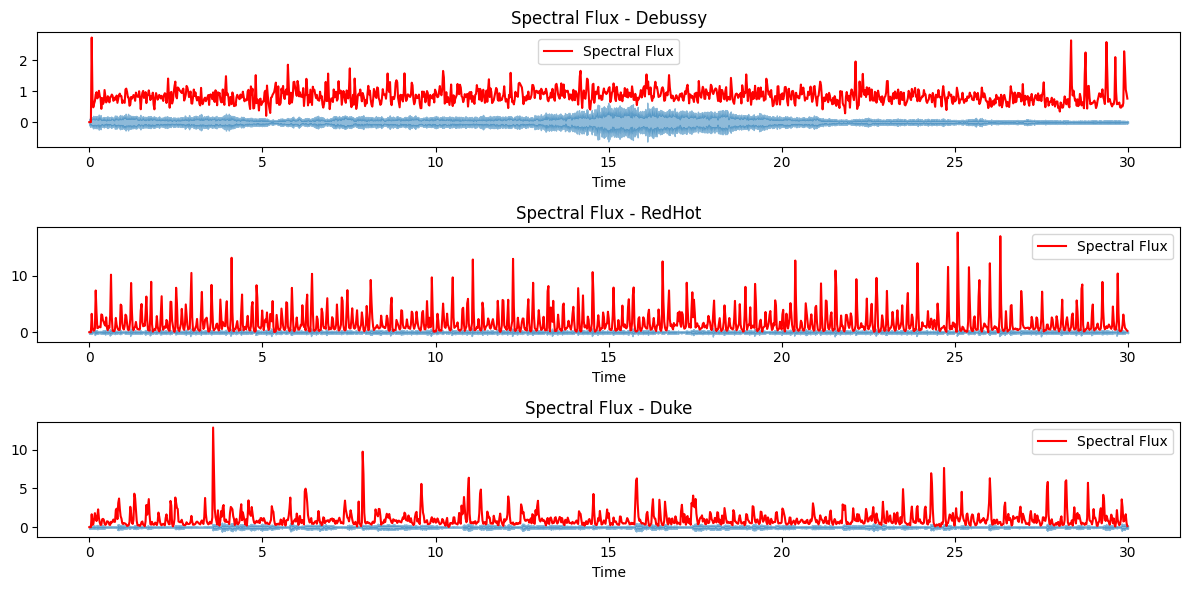

In [33]:
# Function to compute Spectral Flux
def compute_spectral_flux(audio, sr):
    # Calculate the Spectral Flux
    spectral_flux = librosa.onset.onset_strength(y=audio, sr=sr)
    return spectral_flux

# Compute Spectral Flux for each audio file
spectral_flux_debussy = compute_spectral_flux(debussy, sr_debussy)
spectral_flux_redhot = compute_spectral_flux(redhot, sr_redhot)
spectral_flux_duke = compute_spectral_flux(duke, sr_duke)

# Plotting Spectral Flux for each audio file
plt.figure(figsize=(12, 6))

# Plot Spectral Flux for Debussy
plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, sr=sr_debussy, alpha=0.5)
plt.plot(librosa.times_like(spectral_flux_debussy), spectral_flux_debussy, label='Spectral Flux', color='r')
plt.title('Spectral Flux - Debussy')
plt.legend()

# Plot Spectral Flux for RedHot
plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, sr=sr_redhot, alpha=0.5)
plt.plot(librosa.times_like(spectral_flux_redhot), spectral_flux_redhot, label='Spectral Flux', color='r')
plt.title('Spectral Flux - RedHot')
plt.legend()

# Plot Spectral Flux for Duke
plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, sr=sr_duke, alpha=0.5)
plt.plot(librosa.times_like(spectral_flux_duke), spectral_flux_duke, label='Spectral Flux', color='r')
plt.title('Spectral Flux - Duke')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

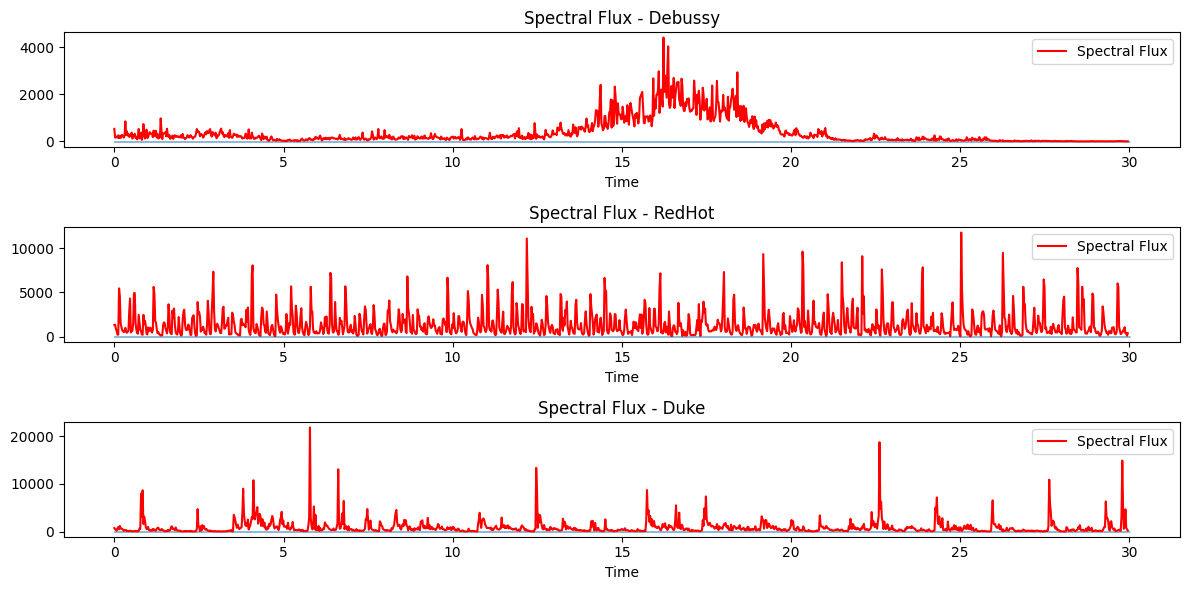

In [22]:
# Function to compute Spectral Flux manually
def compute_spectral_flux_manual(audio, sr, n_fft=1024, hop_length=512):
    # Compute the STFT
    D = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
    
    # Compute the magnitude spectrogram (absolute value of the STFT)
    magnitude = np.abs(D)
    
    # Compute the difference between consecutive frames
    flux = np.sum(np.diff(magnitude, axis=1)**2, axis=0)
    
    return flux

# Load audio files (use the appropriate paths for your files)
debussy_audio, sr_debussy = librosa.load(debussy_file, sr=None)
redhot_audio, sr_redhot = librosa.load(redhot_file, sr=None)
duke_audio, sr_duke = librosa.load(duke_file, sr=None)

# Normalize the audio signals
debussy_audio = librosa.util.normalize(debussy_audio)
redhot_audio = librosa.util.normalize(redhot_audio)
duke_audio = librosa.util.normalize(duke_audio)

# Compute the Spectral Flux manually for each audio file
spectral_flux_debussy = compute_spectral_flux_manual(debussy_audio, sr_debussy)
spectral_flux_redhot = compute_spectral_flux_manual(redhot_audio, sr_redhot)
spectral_flux_duke = compute_spectral_flux_manual(duke_audio, sr_duke)

# Plotting Spectral Flux manually for each audio file
plt.figure(figsize=(12, 6))

# Plot Spectral Flux for Debussy
plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy_audio, sr=sr_debussy, alpha=0.5)
plt.plot(librosa.times_like(spectral_flux_debussy), spectral_flux_debussy, label='Spectral Flux', color='r')
plt.title('Spectral Flux - Debussy')
plt.legend()

# Plot Spectral Flux for RedHot
plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot_audio, sr=sr_redhot, alpha=0.5)
plt.plot(librosa.times_like(spectral_flux_redhot), spectral_flux_redhot, label='Spectral Flux', color='r')
plt.title('Spectral Flux - RedHot')
plt.legend()

# Plot Spectral Flux for Duke
plt.subplot(3, 1, 3)
librosa.display.waveshow(duke_audio, sr=sr_duke, alpha=0.5)
plt.plot(librosa.times_like(spectral_flux_duke), spectral_flux_duke, label='Spectral Flux', color='r')
plt.title('Spectral Flux - Duke')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

Spectral Bandwidth

Description: Spectral bandwidth measures the width of the spectrum, indicating how spread out the frequencies of a sound are. Higher bandwidth suggests a brighter, more complex sound, while lower bandwidth indicates a more focused, simpler sound.

Use Case:

Music Genre Classification: Helps distinguish between genres; e.g., electronic music typically has higher spectral bandwidth than classical music.
Instrument Recognition: Differentiates instruments; e.g., electric guitars have higher spectral bandwidth than pianos.

The spectral bandwidth can be computed as:

$$
\text{Spectral Bandwidth}(t) = \frac{\sum_f (f - C)^2 \cdot S(f, t)}{\sum_f S(f, t)}
$$

Where:

- \( f \) = Frequency bins.
- \( S(f, t) \) = Magnitude (or power) of the frequency component \( f \) at time \( t \), typically computed using a Short-Time Fourier Transform (STFT).
- \( C \) = The spectral centroid (which represents the "center" of the spectrum), computed as:

$$
C = \frac{\sum_f f \cdot S(f, t)}{\sum_f S(f, t)}
$$

The summation is performed over all frequency bins \( f \), and this calculation is usually performed for each time frame \( t \).


Spectral Bandwidth Amplitude in Sound:

Spectral bandwidth refers to the range of frequencies in a sound signal, and its amplitude represents how much of that range is present at any given moment. It essentially tells us how "spread out" or "wide" the frequencies in a sound are.

Breaking it Down:
Spectral: This refers to the spectrum of frequencies in the sound. Every sound can be broken down into different frequencies (like notes in music). Each frequency corresponds to a different pitch or tone.

Bandwidth: This refers to how wide that frequency spectrum is. For example, if a sound has a narrow bandwidth, it means that most of its energy is concentrated around one frequency (like a pure tone). If it has a wide bandwidth, the frequencies are more spread out (like a complex, rich sound).

Amplitude: This tells us how much energy is present in a particular frequency or group of frequencies. Higher amplitude means the sound is louder, while lower amplitude means it's quieter.

What Does Spectral Bandwidth Amplitude Tell Us?

Narrow Bandwidth: Sounds with a narrow bandwidth (like pure sine waves) tend to sound simple and clear. They lack overtones or harmonics.

Wide Bandwidth: Sounds with a wide bandwidth (like the sound of a bell or a guitar) sound complex and rich, with many overtones adding texture.

Use Case and Applications:

Music Production

Speech Processing

Audio Compression

Hearing Aids

Environmental Sound Analysis

Music Genre Classification:
Application: Spectral bandwidth is used in music genre classification tasks to identify genre-specific spectral characteristics.
Use Case: Different music genres have different characteristics in terms of spectral content. For example, classical music may have a broader bandwidth due to the wide range of instruments, while ambient music may have a narrower bandwidth. Machine learning models use spectral bandwidth as a feature to classify music into genres based on its spectral characteristics.

Speech and Speaker Recognition:
Application: Spectral bandwidth is often used in speech analysis to help recognize the quality and characteristics of the speech.
Use Case: In speech recognition and speaker identification systems, spectral bandwidth is used to assess how sharp or "bright" a voice sounds. For example, male voices typically have a lower spectral bandwidth compared to female voices, which are often more "brilliant" or "sharp" in nature. This can be used in systems designed for voice authentication or identifying a speaker based on voice features.

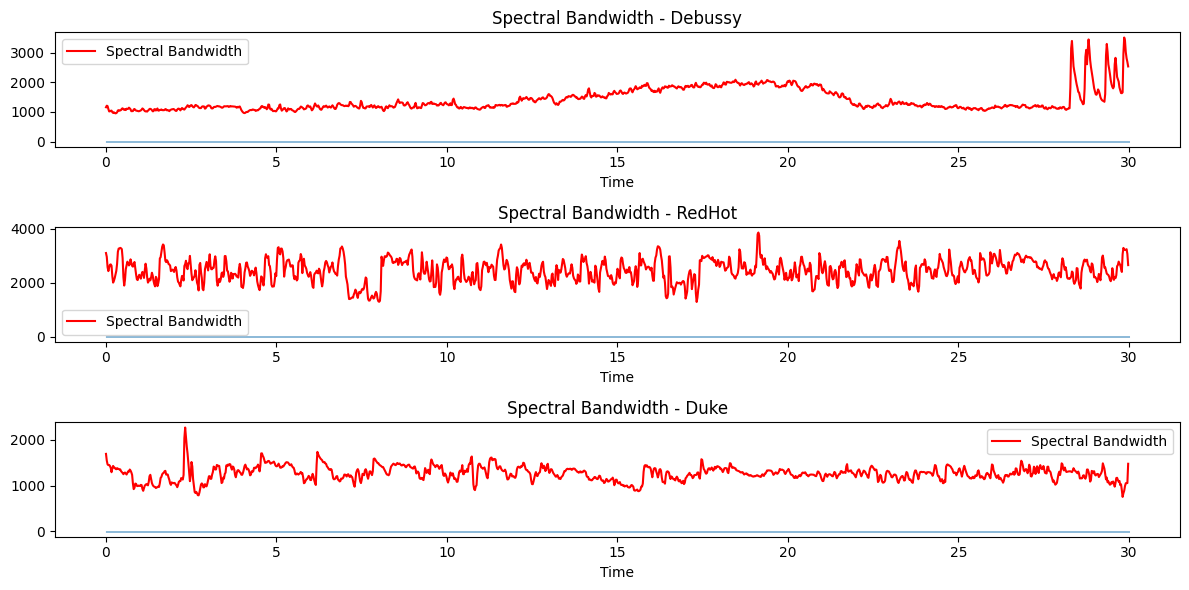

In [35]:
# Function to compute Spectral Bandwidth
def compute_spectral_bandwidth(audio, sr):
    # Compute the Spectral Bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
    return spectral_bandwidth

# Compute Spectral Bandwidth for each audio file
spectral_bandwidth_debussy = compute_spectral_bandwidth(debussy, sr_debussy)
spectral_bandwidth_redhot = compute_spectral_bandwidth(redhot, sr_redhot)
spectral_bandwidth_duke = compute_spectral_bandwidth(duke, sr_duke)

# Plotting Spectral Bandwidth for each audio file
plt.figure(figsize=(12, 6))

# Plot Spectral Bandwidth for Debussy
plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, sr=sr_debussy, alpha=0.5)
plt.plot(librosa.times_like(spectral_bandwidth_debussy), spectral_bandwidth_debussy[0], label='Spectral Bandwidth', color='r')
plt.title('Spectral Bandwidth - Debussy')
plt.legend()

# Plot Spectral Bandwidth for RedHot
plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, sr=sr_redhot, alpha=0.5)
plt.plot(librosa.times_like(spectral_bandwidth_redhot), spectral_bandwidth_redhot[0], label='Spectral Bandwidth', color='r')
plt.title('Spectral Bandwidth - RedHot')
plt.legend()

# Plot Spectral Bandwidth for Duke
plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, sr=sr_duke, alpha=0.5)
plt.plot(librosa.times_like(spectral_bandwidth_duke), spectral_bandwidth_duke[0], label='Spectral Bandwidth', color='r')
plt.title('Spectral Bandwidth - Duke')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

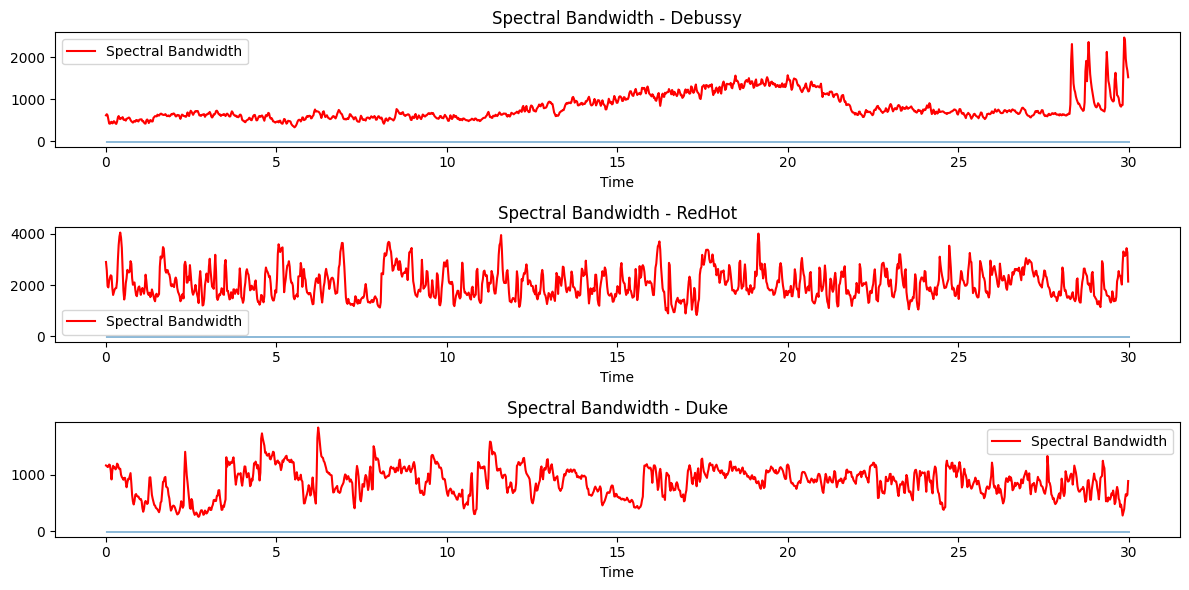

In [27]:
# Function to compute Spectral Centroid manually (from the previous code)
def compute_spectral_centroid(audio, sr, n_fft=2048, hop_length=512):
    # Compute the STFT
    D = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
    
    # Compute the magnitude spectrogram (absolute value of the STFT)
    magnitude = np.abs(D)
    
    # Calculate the frequency bins and reshape for broadcasting
    freqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    freqs = freqs[:, np.newaxis]
    
    # Calculate spectral centroid for each frame
    spectral_centroid = np.sum(freqs * magnitude, axis=0) / np.sum(magnitude, axis=0)
    
    return spectral_centroid
# Function to compute Spectral Bandwidth manually
def compute_spectral_bandwidth_manual(audio, sr, n_fft=2048, hop_length=512):
    # Compute the STFT
    D = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
    
    # Compute the magnitude spectrogram
    magnitude = np.abs(D)
    
    # Calculate the frequency bins and reshape for broadcasting
    freqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    freqs = freqs[:, np.newaxis]
    
    # Compute the Spectral Centroid manually
    spectral_centroid = compute_spectral_centroid(audio, sr, n_fft, hop_length)
    
    # Reshape spectral_centroid to match the shape of magnitude
    spectral_centroid = spectral_centroid[np.newaxis, :]
    
    # Compute the Spectral Bandwidth
    spectral_bandwidth = np.sqrt(np.sum((magnitude**2) * (freqs - spectral_centroid)**2, axis=0) / np.sum(magnitude**2, axis=0))
    
    return spectral_bandwidth
    return spectral_bandwidth

# Load audio files (use the appropriate paths for your files)
debussy_audio, sr_debussy = librosa.load(debussy_file, sr=None)
redhot_audio, sr_redhot = librosa.load(redhot_file, sr=None)
duke_audio, sr_duke = librosa.load(duke_file, sr=None)

# Normalize the audio signals
debussy_audio = librosa.util.normalize(debussy_audio)
redhot_audio = librosa.util.normalize(redhot_audio)
duke_audio = librosa.util.normalize(duke_audio)

# Compute the Spectral Bandwidth manually for each audio file
spectral_bandwidth_debussy = compute_spectral_bandwidth_manual(debussy_audio, sr_debussy)
spectral_bandwidth_redhot = compute_spectral_bandwidth_manual(redhot_audio, sr_redhot)
spectral_bandwidth_duke = compute_spectral_bandwidth_manual(duke_audio, sr_duke)

# Plotting Spectral Bandwidth manually for each audio file
plt.figure(figsize=(12, 6))

# Plot Spectral Bandwidth for Debussy
plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy_audio, sr=sr_debussy, alpha=0.5)
plt.plot(librosa.times_like(spectral_bandwidth_debussy), spectral_bandwidth_debussy, label='Spectral Bandwidth', color='r')
plt.title('Spectral Bandwidth - Debussy')
plt.legend()

# Plot Spectral Bandwidth for RedHot
plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot_audio, sr=sr_redhot, alpha=0.5)
plt.plot(librosa.times_like(spectral_bandwidth_redhot), spectral_bandwidth_redhot, label='Spectral Bandwidth', color='r')
plt.title('Spectral Bandwidth - RedHot')
plt.legend()

# Plot Spectral Bandwidth for Duke
plt.subplot(3, 1, 3)
librosa.display.waveshow(duke_audio, sr=sr_duke, alpha=0.5)
plt.plot(librosa.times_like(spectral_bandwidth_duke), spectral_bandwidth_duke, label='Spectral Bandwidth', color='r')
plt.title('Spectral Bandwidth - Duke')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

Mel-Frequency Cepstral Coefficients (MFCC)

Description: MFCCs are a representation of the short-term power spectrum of sound, often used in speech and audio processing. They are based on the Mel scale, which approximates the human ear’s perception of pitch.

Use Case:
Widely used in speech recognition, as they effectively represent speech characteristics, making them ideal for tasks like transcription or speaker identification.
In music genre classification, MFCCs can help differentiate between genres by capturing timbral features.

How MFCCs Work:

Pre-emphasis

Framing

Fourier Transform

Mel Scale

Cepstral Coefficients

Applications of MFCCs:

Speech Recognition

Speaker Identification

Music Genre Classification

Emotion Recognition

Why Are MFCCs Useful?

Compact Representation

Mimicking Human Hearing

Good for Pattern Recognition

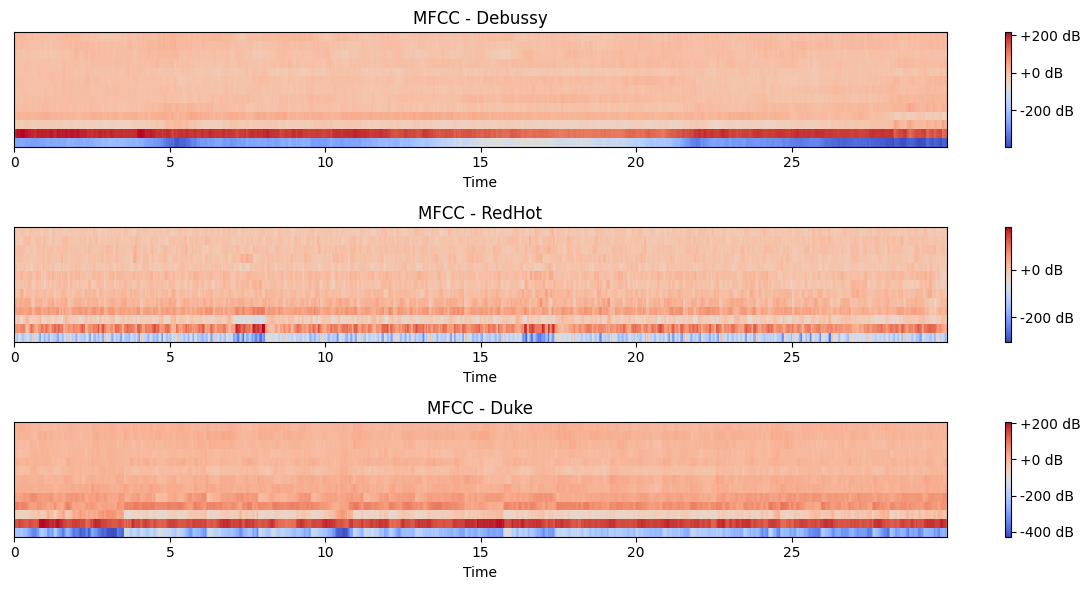

In [36]:
# Function to compute MFCCs
def compute_mfcc(audio, sr):
    # Compute the MFCCs
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)  # Typically 13 MFCCs are used
    return mfcc

# Compute MFCCs for each audio file
mfcc_debussy = compute_mfcc(debussy, sr_debussy)
mfcc_redhot = compute_mfcc(redhot, sr_redhot)
mfcc_duke = compute_mfcc(duke, sr_duke)

# Plotting MFCCs for each audio file
plt.figure(figsize=(12, 6))

# Plot MFCCs for Debussy
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc_debussy, x_axis='time', sr=sr_debussy, cmap='coolwarm')
plt.title('MFCC - Debussy')
plt.colorbar(format='%+2.0f dB')

# Plot MFCCs for RedHot
plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc_redhot, x_axis='time', sr=sr_redhot, cmap='coolwarm')
plt.title('MFCC - RedHot')
plt.colorbar(format='%+2.0f dB')

# Plot MFCCs for Duke
plt.subplot(3, 1, 3)
librosa.display.specshow(mfcc_duke, x_axis='time', sr=sr_duke, cmap='coolwarm')
plt.title('MFCC - Duke')
plt.colorbar(format='%+2.0f dB')

# Show the plots
plt.tight_layout()
plt.show()

Pitch (Fundamental Frequency)

Description: Pitch refers to the perceived frequency of a sound, typically linked to the fundamental frequency (the lowest frequency of a periodic waveform).

Use Case:
In speech synthesis and music composition, pitch detection is crucial for creating natural-sounding speech and musical notes.
In music analysis, pitch is fundamental for tasks like key detection, melody extraction, or chord recognition.

## Pitch Formula for an Audio File:

Pitch refers to the perceived frequency of a sound, which determines whether it sounds "high" or "low." It's one of the most important attributes in music, speech, and sound analysis. In the context of an audio signal, pitch is typically derived from the fundamental frequency (the lowest frequency component of a sound), although complex sounds may contain multiple harmonic frequencies that influence the perception of pitch.

The fundamental frequency \( f_0 \), which is often used to determine the pitch, can be estimated from an audio signal using techniques such as Autocorrelation, the YIN algorithm, or Fast Fourier Transform (FFT).

### Autocorrelation Method

One common way to calculate the fundamental frequency (pitch) of an audio signal is by using autocorrelation. The formula for autocorrelation is:

$$
R(\tau) = \sum_t x(t) \cdot x(t + \tau)
$$

Where:

- \( R(\tau) \) is the autocorrelation at lag \( \tau \).
- \( x(t) \) is the audio signal at time \( t \).
- The lag \( \tau \) is the time difference between the signal and its delayed version.

The fundamental frequency is then determined by finding the lag \( \tau \) that maximizes the autocorrelation. After identifying the peak in the autocorrelation, the fundamental frequency \( f_0 \) can be calculated as:

$$
f_0 = \frac{1}{\tau}
$$

Where \( \tau \) is the time period between two successive peaks of the autocorrelation function.

Alternatively, a Fourier transform can be used, where the pitch is extracted as the frequency of the largest spectral peak.


Pitch refers to how "high" or "low" a sound is. It is determined by the frequency of the sound waves, which is the number of vibrations or cycles per second (measured in Hertz, Hz).

Higher pitch sounds have higher frequencies, and lower pitch sounds have lower frequencies.

For example:

A whistle has a high pitch because it vibrates very fast.

A drum beat has a low pitch because it vibrates slower.

Pitch and Amplitude: Are They the Same?

Pitch and Amplitude are NOT the same. They represent different aspects of sound:

Pitch is about frequency (how high or low the sound is).

Amplitude is about volume (how loud or soft the sound is).

Use Cases and Applications of Pitch and Amplitude

Music and Sound Design

Speech and Communication

Acoustic Engineering

Hearing Aids and Sound Processing

Sonar and Ultrasound

Music Transcription and Analysis:
Application: Pitch detection is widely used in music transcription systems that convert audio recordings into musical notation or sheet music.
Use Case: Automated systems for transcribing music can analyze the pitch of each note in a piece of music to generate accurate sheet music. For example, a piano performance can be transcribed by detecting the pitch of each note played.

Pitch Detection in Speech:
Application: In speech processing, pitch is used to analyze and synthesize human speech, including applications like voice recognition and emotion detection.
Use Case: In speech synthesis systems (such as text-to-speech), pitch is used to generate natural-sounding intonation and rhythm. The pitch contour of a spoken sentence (how the pitch rises and falls) is also important for detecting emotional tone. For example, a raised pitch might indicate a question, while a falling pitch indicates a statement.

Musical Instrument Tuning:
Application: Pitch detection is essential in tuning musical instruments, especially string and wind instruments, where tuning depends on matching the fundamental pitch to a specific frequency.
Use Case: An automatic tuning system for a guitar uses pitch detection to compare the pitch of a string with the desired target frequency (e.g., the note A4 at 440 Hz) and provides feedback to the musician on whether the string is too high or too low in pitch.

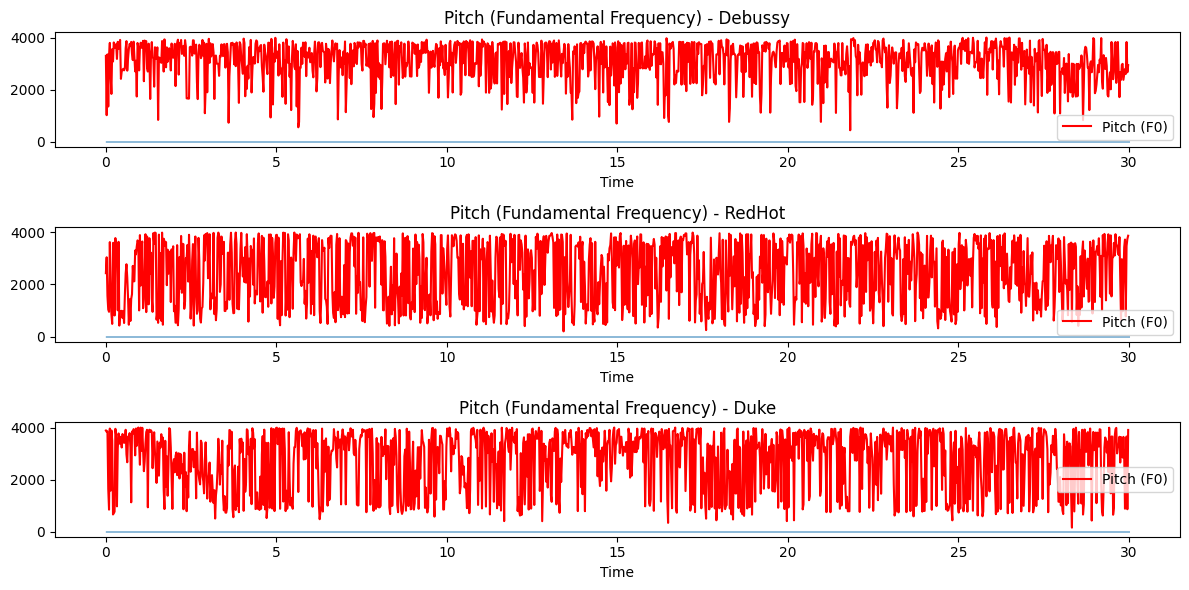

In [37]:
# Function to compute the pitch (fundamental frequency)
def compute_pitch(audio, sr):
    # Use librosa's piptrack to extract pitch (fundamental frequency)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    pitches, magnitudes = librosa.core.piptrack(S=D, sr=sr)
    
    # Get the pitch with the highest magnitude at each time frame
    pitch = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()  # Get index of max magnitude
        pitch.append(pitches[index, t])
    
    return np.array(pitch)

# Compute pitch (fundamental frequency) for each audio file
pitch_debussy = compute_pitch(debussy, sr_debussy)
pitch_redhot = compute_pitch(redhot, sr_redhot)
pitch_duke = compute_pitch(duke, sr_duke)

# Plotting Pitch (Fundamental Frequency) for each audio file
plt.figure(figsize=(12, 6))

# Plot Pitch for Debussy
plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, sr=sr_debussy, alpha=0.5)
plt.plot(librosa.times_like(pitch_debussy), pitch_debussy, label='Pitch (F0)', color='r')
plt.title('Pitch (Fundamental Frequency) - Debussy')
plt.legend()

# Plot Pitch for RedHot
plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, sr=sr_redhot, alpha=0.5)
plt.plot(librosa.times_like(pitch_redhot), pitch_redhot, label='Pitch (F0)', color='r')
plt.title('Pitch (Fundamental Frequency) - RedHot')
plt.legend()

# Plot Pitch for Duke
plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, sr=sr_duke, alpha=0.5)
plt.plot(librosa.times_like(pitch_duke), pitch_duke, label='Pitch (F0)', color='r')
plt.title('Pitch (Fundamental Frequency) - Duke')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

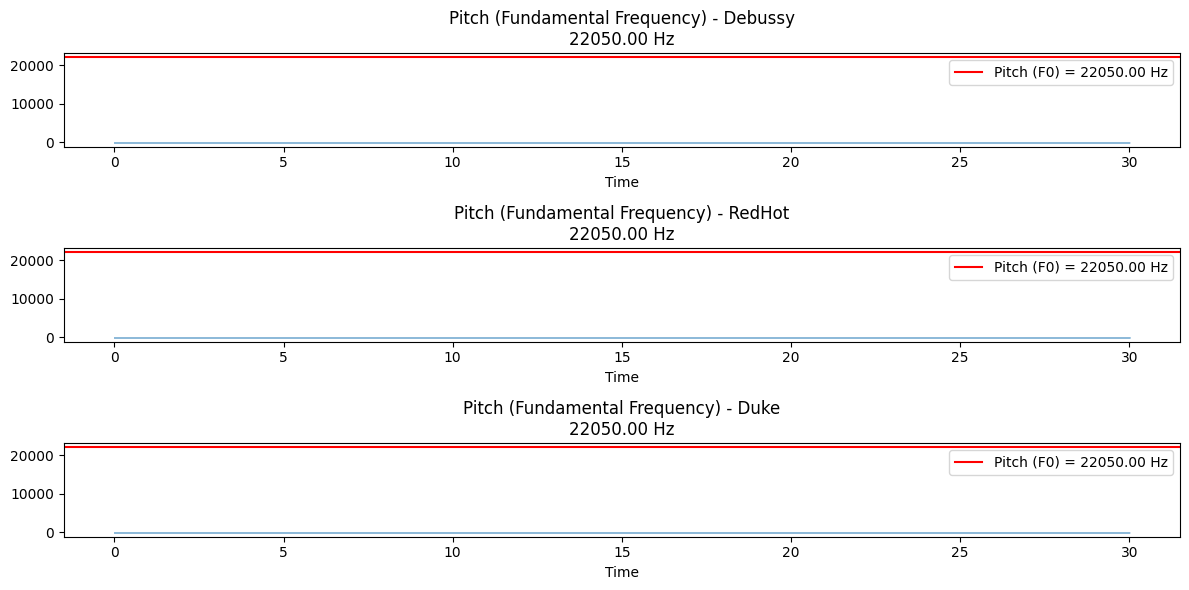

In [34]:
# Function to compute pitch (fundamental frequency) manually using autocorrelation
def compute_pitch_manual(audio, sr, max_lag=1000):
    # Preprocessing: Normalize the audio signal to have mean 0 and variance 1
    audio = audio - np.mean(audio)
    audio = audio / np.max(np.abs(audio))
    
    # Autocorrelation function
    def autocorr(x):
        result = np.correlate(x, x, mode='full')
        return result[result.size // 2:]

    # Compute autocorrelation
    corr = autocorr(audio)
    
    # Find the first peak in the autocorrelation function (excluding the zero lag)
    peak_index = np.argmax(corr[1:max_lag]) + 1  # Ignore the first element (zero lag)
    
    # Calculate the period (in samples) from the peak index
    period = peak_index
    
    # Calculate the fundamental frequency (pitch) as the inverse of the period
    pitch = sr / period
    
    return pitch

# Compute pitch for each audio file manually
pitch_debussy_manual = compute_pitch_manual(debussy, sr_debussy)
pitch_redhot_manual = compute_pitch_manual(redhot, sr_redhot)
pitch_duke_manual = compute_pitch_manual(duke, sr_duke)

# Plotting Pitch (Fundamental Frequency) for each audio file
plt.figure(figsize=(12, 6))

# Plot Pitch for Debussy
plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, sr=sr_debussy, alpha=0.5)
plt.axhline(y=pitch_debussy_manual, color='r', linestyle='-', label=f'Pitch (F0) = {pitch_debussy_manual:.2f} Hz')
plt.title(f'Pitch (Fundamental Frequency) - Debussy\n{pitch_debussy_manual:.2f} Hz')
plt.legend()

# Plot Pitch for RedHot
plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, sr=sr_redhot, alpha=0.5)
plt.axhline(y=pitch_redhot_manual, color='r', linestyle='-', label=f'Pitch (F0) = {pitch_redhot_manual:.2f} Hz')
plt.title(f'Pitch (Fundamental Frequency) - RedHot\n{pitch_redhot_manual:.2f} Hz')
plt.legend()

# Plot Pitch for Duke
plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, sr=sr_duke, alpha=0.5)
plt.axhline(y=pitch_duke_manual, color='r', linestyle='-', label=f'Pitch (F0) = {pitch_duke_manual:.2f} Hz')
plt.title(f'Pitch (Fundamental Frequency) - Duke\n{pitch_duke_manual:.2f} Hz')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

Spectral Roll-off refers to the frequency point in a signal's spectrum where a certain percentage of the total spectral energy is contained below it.

In simpler terms, it is a measure that helps to identify how much of the sound energy lies within lower frequencies and how much lies within higher frequencies.

## Spectral Roll-off:

The spectral roll-off at a given time is computed as follows:

$$
\text{Spectral Roll-off}(t) = \min \left( f \mid \sum_{f=0}^{f} S(f, t) \geq p \cdot \sum_{f=0}^{F} S(f, t) \right)
$$

Where:

- \( S(f, t) \) is the magnitude of the spectral coefficient at frequency \( f \) and time \( t \).
- \( p \) is the roll-off threshold (typically 0.85 or 0.95), representing the percentage of spectral energy.
- \( F \) is the total number of frequency bins (the highest frequency in the signal).

Essentially, the spectral roll-off identifies the frequency \( f \) at which the cumulative sum of the spectral energy exceeds a specified percentage \( p \) of the total energy in the spectrum. This frequency is the "roll-off" point.


In sound, frequency is the pitch of the sound (high or low).

Spectral energy refers to the intensity of the sound at different frequencies.

Spectral Roll-off tells us where the "energy" in the sound starts to drop off, typically indicating the transition from lower (more musical, harmonic) frequencies to higher (often noisier, less harmonic) frequencies.

How is Spectral Roll-off Calculated?

Find the power at each frequency

Cumulatively add the power

Find the roll-off point

Applications of Spectral Roll-off

Music Genre Classification

Speech vs. Noise Detection

Audio Compression

Audio Signal Processing

Music Genre Classification:
Application: Spectral roll-off is used as a feature in music genre classification.
Use Case: Different music genres tend to have different spectral characteristics. For example, classical music tends to have a smoother spectrum with lower roll-off, while electronic dance music often has a higher roll-off due to the presence of higher frequencies. By analyzing spectral roll-off, machine learning models can classify music into genres like classical, rock, or electronic based on their spectral characteristics.

Speech and Vocal Analysis:
Application: Spectral roll-off is used in speech analysis for distinguishing between voiced and unvoiced speech sounds.
Use Case: In speech recognition systems, spectral roll-off can help to distinguish between speech and noise. Voiced speech sounds (like vowels) tend to have lower roll-off values, while unvoiced sounds (like consonants or noise) have higher roll-off values. By analyzing roll-off, the system can determine whether a sound is speech, background noise, or an unvoiced sound, improving recognition accuracy.

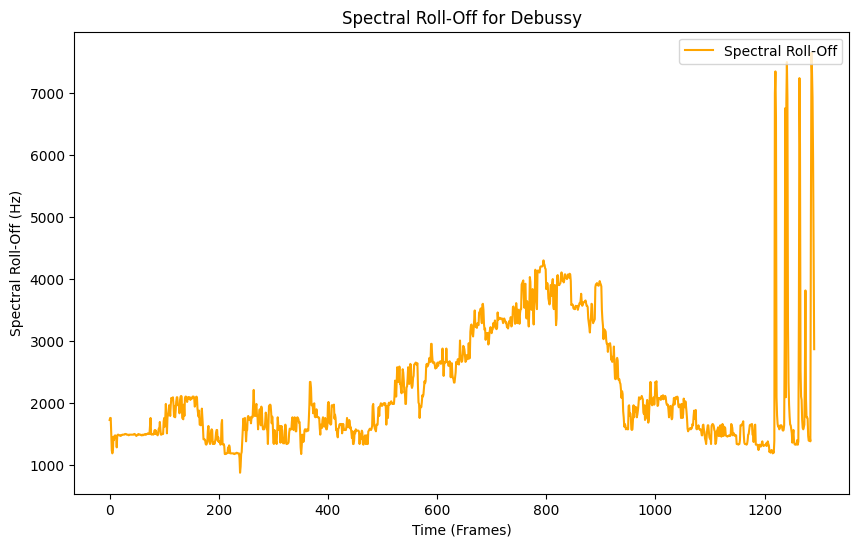

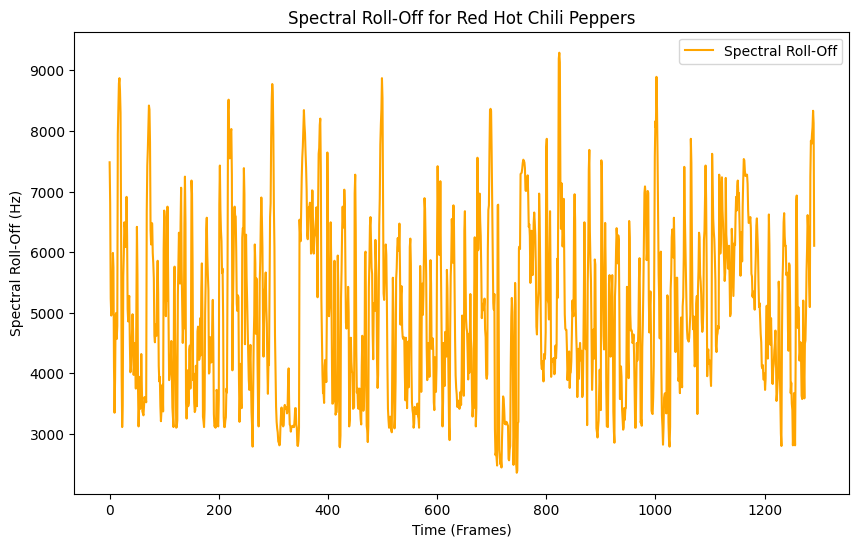

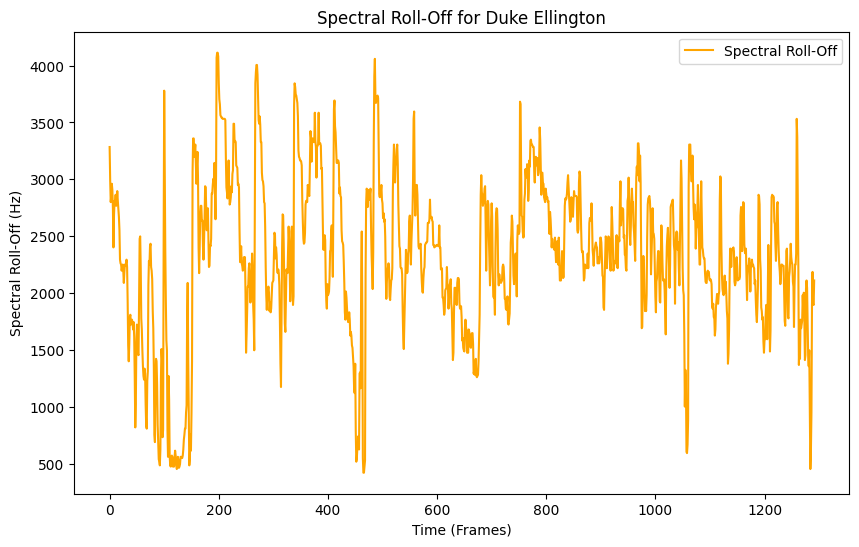

In [44]:
# Function to compute and plot spectral roll-off
def plot_spectral_rolloff(audio, sr, title):
    # Compute the spectral roll-off (default: 85% of the cumulative energy)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr, roll_percent=0.85)[0]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(spectral_rolloff, label="Spectral Roll-Off", color='orange')
    plt.title(f'Spectral Roll-Off for {title}')
    plt.xlabel('Time (Frames)')
    plt.ylabel('Spectral Roll-Off (Hz)')
    plt.legend(loc='upper right')
    plt.show()

# Plot Spectral Roll-Off for each audio file
plot_spectral_rolloff(debussy_audio, sr_debussy, 'Debussy')
plot_spectral_rolloff(redhot_audio, sr_redhot, 'Red Hot Chili Peppers')
plot_spectral_rolloff(duke_audio, sr_duke, 'Duke Ellington')

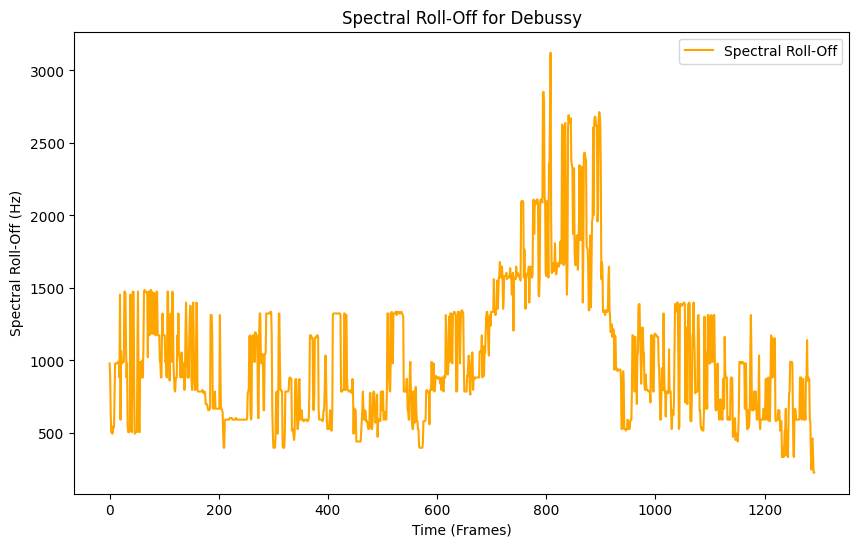

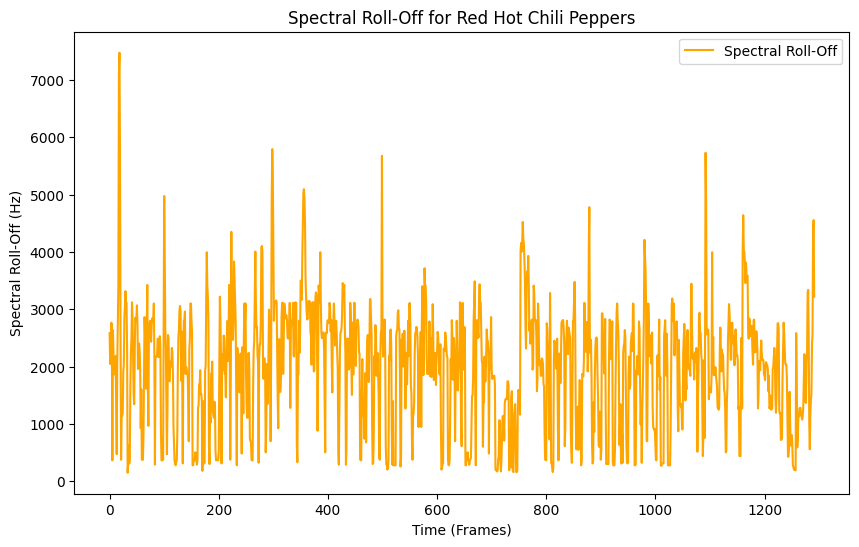

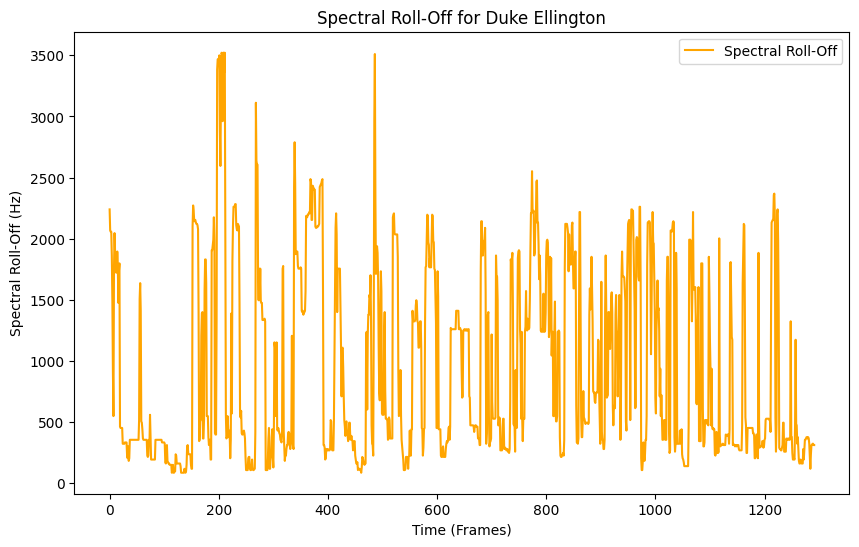

In [45]:
# Function to compute and plot spectral roll-off manually
def manual_spectral_rolloff(audio, sr, roll_off=0.85, frame_length=2048, hop_length=512):
    # Step 1: Compute the short-time Fourier transform (STFT)
    D = librosa.stft(audio, n_fft=frame_length, hop_length=hop_length)
    
    # Step 2: Calculate the magnitude of the STFT
    magnitude = np.abs(D)
    
    # Step 3: Compute the cumulative sum of the magnitude squared (energy)
    energy = np.sum(magnitude**2, axis=0)
    
    # Step 4: Find the spectral roll-off threshold
    threshold = roll_off * energy
    
    # Step 5: For each frame, find the frequency bin where the cumulative sum exceeds the threshold
    cumulative_sum = np.cumsum(magnitude**2, axis=0)
    
    # Roll-off point is the bin where the cumulative sum first exceeds the threshold
    rolloff_bins = np.argmax(cumulative_sum > threshold, axis=0)
    
    # Convert rolloff_bins to frequencies
    freqs = librosa.fft_frequencies(n_fft=frame_length)
    rolloff_freqs = freqs[rolloff_bins]
    
    return rolloff_freqs

# Function to plot the spectral roll-off
def plot_spectral_rolloff(audio, sr, title):
    rolloff_freqs = manual_spectral_rolloff(audio, sr)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(rolloff_freqs, label="Spectral Roll-Off", color='orange')
    plt.title(f'Spectral Roll-Off for {title}')
    plt.xlabel('Time (Frames)')
    plt.ylabel('Spectral Roll-Off (Hz)')
    plt.legend(loc='upper right')
    plt.show()

# Plot Spectral Roll-Off for each audio file
plot_spectral_rolloff(debussy_audio, sr_debussy, 'Debussy')
plot_spectral_rolloff(redhot_audio, sr_redhot, 'Red Hot Chili Peppers')
plot_spectral_rolloff(duke_audio, sr_duke, 'Duke Ellington')